<div style="display: flex; background-color: RGB(233, 150, 122);" >
<h1 style="margin: auto; padding: 30px; "> ANALYSER LES VENTES D'UNE LIBRAIRIE AVEC PYTHON</h1>
</div
   
 

<div style="display: flex; background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 30px; "> PARTIE 1: Préparation des données  </h2>
</div
   

<div style="background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1.1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">1.1.1 - Importation des librairies</h3>
</div>

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

import statsmodels.api as sm

from statsmodels.formula.api import ols

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">1.1.2 - Chargements des fichiers</h3>
</div>

In [2]:
#Importation des fichiers 
customers =pd.read_csv("customers.csv")

products = pd.read_csv("products.csv")

transactions =pd.read_csv("transactions.csv")

<div style="background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1.2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">1.2.1 - Analyse exploratoire du fichier customers</h3>
</div>

In [3]:
# Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(customers.shape[0]))
print("Le tableau comporte {} colonnes".format(customers.shape[1]))

Le tableau comporte 8623 lignes
Le tableau comporte 3 colonnes


In [4]:
#Consulter le nombre de colonnes, la nature des données et le nombre de valeurs présentes dans les colonnes
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
#Afficher les première lignes du tableau
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [6]:
#Remplacer les valeurs de la colonne sex par des majuscules
customers["sex"].replace({"f":"F","m":"M"}, inplace=True)

In [7]:
# Vérifier les doublons dans le tableau 
customers.loc[customers[["client_id","sex","birth"]].duplicated(keep=False),: ]

,client_id,sex,birth


In [8]:
#Vérifications de valeurs nulles 
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">1.2.2 - Analyse exploratoire du fichier products</h3>
</div>

In [9]:
# Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(products.shape[0]))
print("Le tableau comporte {} colonnes".format(products.shape[1]))

Le tableau comporte 3287 lignes
Le tableau comporte 3 colonnes


In [10]:
#Consulter le nombre de colonnes, la nature des données et le nombre de valeurs présentes dans les colonnes
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [11]:
#Afficher les première lignes du tableau
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [12]:
# Vérifier les doublons dans le tableau 
products.loc[products[["id_prod","price","categ"]].duplicated(keep=False),: ]

,id_prod,price,categ


In [13]:
#Vérifications des valeurs nulle
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [14]:
# Afficher les différentes catégories de produits 
products["categ"].unique()

array([0, 1, 2], dtype=int64)

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">1.2.3 - Analyse de la variable prix du fichier products</h3>
</div>

In [15]:
#Afficher le prix minimum
prix_min = products["price"].min()
print("Le prix minimum est de",prix_min,"euros")

#Afficher le prix maximum
prix_max = products["price"].max()
print("Le prix maximum est de",prix_max,"euros")

#Afficher les prix inferieurs à 0
prix_inf_0 = products.loc[products["price"]<0,"price"].count()
print("Il y a ", prix_inf_0,"prix inférieur à 0")

Le prix minimum est de -1.0 euros
Le prix maximum est de 300.0 euros
Il y a  1 prix inférieur à 0


In [16]:
# Vérifier le produit pour lequel nous avons un prix négatif
products.loc[products["price"]<0,:]

,id_prod,price,categ
731,T_0,-1.0,0


In [17]:
#supprimer le produit avec un prix négatif 
produit_test = products.loc[products["price"]<0,:].index
products = products.drop(produit_test).reset_index(drop=True)
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3281,2_23,115.99,2
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">1.2.4 - Analyse exploratoire du fichier transactions</h3>
</div>

In [18]:
# Afficher les dimensions du dataset
print("Le tableau comporte {} lignes".format(transactions.shape[0]))
print("Le tableau comporte {} colonnes".format(transactions.shape[1]))

Le tableau comporte 679532 lignes
Le tableau comporte 4 colonnes


In [19]:
#Consulter le nombre de colonnes, la nature des données et le nombre de valeurs présentes dans les colonnes
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [20]:
#Afficher les première lignes du tableau
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [21]:
# Vérifier les doublons dans le tableau 
transactions.loc[transactions[["id_prod","date","session_id","client_id"]].duplicated(keep=False),: ]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [22]:
#Vérifier les valeurs nulles
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [23]:
# plusieurs lignes de test présentes avec une session_id s_o
# Voir le total de ces lignes dans le tableau 
transactions.loc[transactions["session_id"]=="s_0",:]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [24]:
#suppression des lignes de test qui ont pour session 's_0'
transactions= transactions[transactions["session_id"]!="s_0"]

transactions= transactions.reset_index(drop=True)

transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


<div style="background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1.3 - Jointure des tables</h2>
</div>

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">1.3.1 - Analyse et jointure de la table transactions non nettoyée et la table transactions nettoyée</h3>
</div>

In [25]:
# Le dataset transactions non nettoyé contient un nombre de lignes inférieures au dataset Transaction nettoyé

#Importation du dataset Transaction nettoyé
transac=pd.read_csv("Transac.csv", sep=";", low_memory=False)
transac                     

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
1048570,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN


In [26]:
#Suppresion des lignes NaN
transac.dropna(inplace=True)

In [27]:
#Jointure des deux tables transactions car nombre de lignes différentes
jointure = transactions.merge(transac, how="outer", on="date", indicator=True)

jointure

,id_prod_x,date,session_id_x,client_id_x,id_prod_y,session_id_y,client_id_y,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,0_1518,s_211425,c_103,both
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,1_251,s_158752,c_8534,both
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,0_1277,s_225667,c_6714,both
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2_209,s_52962,c_6941,both
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,0_1509,s_325227,c_4232,both
...,...,...,...,...,...,...,...,...
687750,NaN,2021-10-31 21:55:48.951994,NaN,NaN,1_304,s_112918,c_447,right_only
687751,NaN,2021-10-31 23:26:50.550481,NaN,NaN,1_312,s_112944,c_8618,right_only
687752,NaN,2021-10-31 23:26:58.749513,NaN,NaN,1_551,s_112944,c_8618,right_only
687753,NaN,2021-10-31 23:51:46.454722,NaN,NaN,1_364,s_112949,c_1767,right_only


In [28]:
#Identifier les lignes non communes aux deux tables

jointure[jointure["_merge"]!="both"]

,id_prod_x,date,session_id_x,client_id_x,id_prod_y,session_id_y,client_id_y,_merge
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,NaN,left_only
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,NaN,left_only
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,NaN,left_only
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,NaN,left_only
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...
687750,NaN,2021-10-31 21:55:48.951994,NaN,NaN,1_304,s_112918,c_447,right_only
687751,NaN,2021-10-31 23:26:50.550481,NaN,NaN,1_312,s_112944,c_8618,right_only
687752,NaN,2021-10-31 23:26:58.749513,NaN,NaN,1_551,s_112944,c_8618,right_only
687753,NaN,2021-10-31 23:51:46.454722,NaN,NaN,1_364,s_112949,c_1767,right_only


In [29]:
# Dataframe des lignes manquantes dans les deux datasets transactions
lignes_manquantes = pd.concat([transac,transactions]).drop_duplicates(keep=False)
lignes_manquantes

,id_prod,date,session_id,client_id
195884,1_288,2021-10-01 00:03:30.782117,s_98171,c_4492
195885,1_488,2021-10-01 00:03:38.968413,s_98171,c_4492
195909,1_339,2021-10-01 00:35:33.611954,s_98184,c_122
195911,1_376,2021-10-01 00:35:54.923276,s_98184,c_122
195914,1_274,2021-10-01 00:41:18.416186,s_98185,c_1609
...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098


In [30]:
#Concaténation des lignes manquantes avec le dataset transactions et supprimer les doublons
transactions =pd.concat([transactions, lignes_manquantes]).drop_duplicates()
transactions.reset_index(drop=True, inplace=True)

transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
687750,1_304,2021-10-31 21:55:48.951994,s_112918,c_447
687751,1_312,2021-10-31 23:26:50.550481,s_112944,c_8618
687752,1_551,2021-10-31 23:26:58.749513,s_112944,c_8618
687753,1_364,2021-10-31 23:51:46.454722,s_112949,c_1767


In [31]:
#Vérification du dataset final 
transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687755 entries, 0 to 687754
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687755 non-null  object
 1   date        687755 non-null  object
 2   session_id  687755 non-null  object
 3   client_id   687755 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


In [32]:
#Vérifier les valeurs nulles
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 1.3.2 - Jointure du fichier customers et transactions</h3>
</div>

In [33]:
#Fusion des fichiers customers et transactions
df_liaison1 = customers.merge(transactions, how="outer", on="client_id", indicator=True)
df_liaison1

,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_4410,F,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,both
1,c_4410,F,1967,1_385,2021-03-22 01:40:22.782925,s_9707,both
2,c_4410,F,1967,1_190,2021-11-12 18:11:43.280574,s_118628,both
3,c_4410,F,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,both
4,c_4410,F,1967,1_483,2022-03-13 21:35:55.949042,s_178686,both
...,...,...,...,...,...,...,...
687773,c_84,F,1982,0_1438,2022-05-29 06:11:50.316631,s_215697,both
687774,c_84,F,1982,0_1020,2021-10-21 03:52:13.863959,s_107849,both
687775,c_84,F,1982,0_1399,2021-10-01 16:13:18.997813,s_98493,both
687776,c_84,F,1982,0_1417,2021-03-13 23:55:06.835238,s_5960,both


In [34]:
# Vérification des données après la jointure 1
df_liaison1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687778 entries, 0 to 687777
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   client_id   687778 non-null  object  
 1   sex         687778 non-null  object  
 2   birth       687778 non-null  int64   
 3   id_prod     687755 non-null  object  
 4   date        687755 non-null  object  
 5   session_id  687755 non-null  object  
 6   _merge      687778 non-null  category
dtypes: category(1), int64(1), object(5)
memory usage: 32.1+ MB


In [35]:
#Verification de la colonne _merge et voir si toutes les lignes sont 'both' ou non 
df_liaison1[df_liaison1["_merge"]!="both"]

,client_id,sex,birth,id_prod,date,session_id,_merge
60153,c_8253,F,2001,NaN,NaN,NaN,left_only
202629,c_3789,F,1997,NaN,NaN,NaN,left_only
220741,c_4406,F,1998,NaN,NaN,NaN,left_only
220742,ct_0,F,2001,NaN,NaN,NaN,left_only
223004,c_2706,F,1967,NaN,NaN,NaN,left_only
228233,c_3443,M,1959,NaN,NaN,NaN,left_only
251424,c_4447,M,1956,NaN,NaN,NaN,left_only
251984,c_3017,F,1992,NaN,NaN,NaN,left_only
264176,c_4086,F,1992,NaN,NaN,NaN,left_only
316762,c_6930,M,2004,NaN,NaN,NaN,left_only


In [36]:
# dataframe des clients sans transactions
clients_non_acheteurs = df_liaison1[df_liaison1["_merge"]!="both"]

clients_non_acheteurs[["client_id","sex","birth"]]


,client_id,sex,birth
60153,c_8253,F,2001
202629,c_3789,F,1997
220741,c_4406,F,1998
220742,ct_0,F,2001
223004,c_2706,F,1967
228233,c_3443,M,1959
251424,c_4447,M,1956
251984,c_3017,F,1992
264176,c_4086,F,1992
316762,c_6930,M,2004


In [37]:
# suppression des clients sans transactions

df_liaison1 = df_liaison1.drop(clients_non_acheteurs.index)
df_liaison1

,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_4410,F,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,both
1,c_4410,F,1967,1_385,2021-03-22 01:40:22.782925,s_9707,both
2,c_4410,F,1967,1_190,2021-11-12 18:11:43.280574,s_118628,both
3,c_4410,F,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,both
4,c_4410,F,1967,1_483,2022-03-13 21:35:55.949042,s_178686,both
...,...,...,...,...,...,...,...
687773,c_84,F,1982,0_1438,2022-05-29 06:11:50.316631,s_215697,both
687774,c_84,F,1982,0_1020,2021-10-21 03:52:13.863959,s_107849,both
687775,c_84,F,1982,0_1399,2021-10-01 16:13:18.997813,s_98493,both
687776,c_84,F,1982,0_1417,2021-03-13 23:55:06.835238,s_5960,both


In [38]:
#suppresion de la colonne merge
df_liaison1.drop(columns="_merge",axis=1, inplace=True)

In [39]:
#Vérifier les valeurs nulles
df_liaison1.isnull().sum()

client_id     0
sex           0
birth         0
id_prod       0
date          0
session_id    0
dtype: int64

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 1.4 - Jonction du fichier df_liaison1 et products</h3>
</div>

In [40]:
#Fusion du df_liaison et products
df_liaison2 = df_liaison1.merge(products, how="outer", on= "id_prod", indicator=True)
df_liaison2

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
0,c_4410,F,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0,both
1,c_4410,F,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.20,0.0,both
2,c_4410,F,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.20,0.0,both
3,c_3654,F,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.20,0.0,both
4,c_3654,F,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.20,0.0,both
...,...,...,...,...,...,...,...,...,...
687771,NaN,NaN,NaN,0_1624,NaN,NaN,24.50,0.0,right_only
687772,NaN,NaN,NaN,2_86,NaN,NaN,132.36,2.0,right_only
687773,NaN,NaN,NaN,0_299,NaN,NaN,22.99,0.0,right_only
687774,NaN,NaN,NaN,0_510,NaN,NaN,23.66,0.0,right_only


In [41]:
#Consulter les colonnes, type de données et le nombre de valeurs présentes dans la table finale
df_liaison2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687776 entries, 0 to 687775
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   client_id   687755 non-null  object  
 1   sex         687755 non-null  object  
 2   birth       687755 non-null  float64 
 3   id_prod     687776 non-null  object  
 4   date        687755 non-null  object  
 5   session_id  687755 non-null  object  
 6   price       687555 non-null  float64 
 7   categ       687555 non-null  float64 
 8   _merge      687776 non-null  category
dtypes: category(1), float64(3), object(5)
memory usage: 42.6+ MB


In [42]:
#Identification des produits non vendus
produits_non_vendus = df_liaison2[df_liaison2["session_id"].isnull()]

produits_non_vendus[["id_prod", "price"]]

,id_prod,price
687755,0_1016,35.06
687756,0_1780,1.67
687757,0_1062,20.08
687758,0_1119,2.99
687759,0_1014,1.15
687760,1_0,31.82
687761,0_1318,20.92
687762,0_1800,22.05
687763,0_1645,2.99
687764,0_322,2.99


In [43]:
#Suppression des produits non vendus du dataframe

df_liaison2 = df_liaison2.drop(produits_non_vendus.index)

df_liaison2

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
0,c_4410,F,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0,both
1,c_4410,F,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.20,0.0,both
2,c_4410,F,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.20,0.0,both
3,c_3654,F,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.20,0.0,both
4,c_3654,F,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.20,0.0,both
...,...,...,...,...,...,...,...,...,...
687750,c_8138,F,1984.0,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0.0,both
687751,c_8138,F,1984.0,0_394,2022-08-09 09:02:38.299240,s_250653,2.14,0.0,both
687752,c_8138,F,1984.0,0_394,2022-03-09 09:02:38.299240,s_176587,2.14,0.0,both
687753,c_8327,M,1972.0,0_394,2022-06-28 22:44:11.200205,s_230707,2.14,0.0,both


In [44]:
#verification des valeurs nulles dans les colonnes 'price' et 'categ'
df_liaison2[df_liaison2["_merge"]!="both"]

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
551319,c_4505,M,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN,left_only
551320,c_4505,M,1976.0,0_2245,2022-11-09 09:23:31.000720,s_295013,NaN,NaN,left_only
551321,c_3468,F,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN,left_only
551322,c_3468,F,1981.0,0_2245,2022-05-11 10:52:05.205583,s_206902,NaN,NaN,left_only
551323,c_1403,F,1978.0,0_2245,2022-09-15 14:26:50.187952,s_268455,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
551535,c_4283,F,1976.0,0_2245,2022-08-01 02:46:38.931757,s_246657,NaN,NaN,left_only
551536,c_4283,F,1976.0,0_2245,2021-09-01 02:46:38.931757,s_83377,NaN,NaN,left_only
551537,c_6236,F,1976.0,0_2245,2022-02-25 00:08:08.736068,s_170426,NaN,NaN,left_only
551538,c_4453,M,1981.0,0_2245,2022-02-16 11:35:20.319501,s_166050,NaN,NaN,left_only


In [45]:
# Produit '0_2245' n'a pas de prix ni de catégorie 

# Remplir la catégorie du produit '0_2245 par 0'
df_liaison2.loc[df_liaison2["id_prod"]=="0_2245","categ"]=0


In [46]:
# Verification du remplissage des valeurs nulles dans la colonne 'categ
df_liaison2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687755 entries, 0 to 687754
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   client_id   687755 non-null  object  
 1   sex         687755 non-null  object  
 2   birth       687755 non-null  float64 
 3   id_prod     687755 non-null  object  
 4   date        687755 non-null  object  
 5   session_id  687755 non-null  object  
 6   price       687534 non-null  float64 
 7   categ       687755 non-null  float64 
 8   _merge      687755 non-null  category
dtypes: category(1), float64(3), object(5)
memory usage: 42.6+ MB


In [47]:
# Calculer la médiane des prix pour la catégorie 0
categ_0_median = products.loc[products["categ"]==0,"price"].median()

categ_0_median = round(categ_0_median,2)


# imputer la médiane des prix de la catégorie 0 pour le produit 0_2245
df_liaison2.loc[df_liaison2["id_prod"]=="0_2245","price"]=categ_0_median

#Vérification de l'imputation dans la colonne price 
df_liaison2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687755 entries, 0 to 687754
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   client_id   687755 non-null  object  
 1   sex         687755 non-null  object  
 2   birth       687755 non-null  float64 
 3   id_prod     687755 non-null  object  
 4   date        687755 non-null  object  
 5   session_id  687755 non-null  object  
 6   price       687755 non-null  float64 
 7   categ       687755 non-null  float64 
 8   _merge      687755 non-null  category
dtypes: category(1), float64(3), object(5)
memory usage: 42.6+ MB


In [48]:
#suppresion de la colonne merge
df_liaison2.drop(columns="_merge",axis=1, inplace=True)

In [49]:
#Vérifier les valeurs nulles
df_liaison2.isnull().sum()

client_id     0
sex           0
birth         0
id_prod       0
date          0
session_id    0
price         0
categ         0
dtype: int64

<div style="display: flex; background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 30px; "> PARTIE 2 : Analyse des indicateurs de ventes  </h2>
</div
   

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 2.1 - Structuration du dataframe final</h3>
</div>

In [50]:
#Conversion de la colonne date au format Datetime 
df_liaison2["date"]= pd.to_datetime(df_liaison2["date"])
df_liaison2

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,F,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0
1,c_4410,F,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.20,0.0
2,c_4410,F,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.20,0.0
3,c_3654,F,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.20,0.0
4,c_3654,F,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.20,0.0
...,...,...,...,...,...,...,...,...
687750,c_8138,F,1984.0,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0.0
687751,c_8138,F,1984.0,0_394,2022-08-09 09:02:38.299240,s_250653,2.14,0.0
687752,c_8138,F,1984.0,0_394,2022-03-09 09:02:38.299240,s_176587,2.14,0.0
687753,c_8327,M,1972.0,0_394,2022-06-28 22:44:11.200205,s_230707,2.14,0.0


In [51]:
#Indéxer la colonne date 

df_liaison2 =df_liaison2.set_index(df_liaison2["date"])


df_liaison2

,client_id,sex,birth,id_prod,date,session_id,price,categ
date,,,,,,,,
2021-12-29 09:11:18.860592,c_4410,F,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0
2022-03-29 09:11:18.860592,c_4410,F,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.20,0.0
2022-05-29 09:11:18.860592,c_4410,F,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.20,0.0
2021-11-26 03:51:34.068872,c_3654,F,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.20,0.0
2022-08-26 03:51:34.068872,c_3654,F,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.20,0.0
...,...,...,...,...,...,...,...,...
2021-11-09 09:02:38.299240,c_8138,F,1984.0,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0.0
2022-08-09 09:02:38.299240,c_8138,F,1984.0,0_394,2022-08-09 09:02:38.299240,s_250653,2.14,0.0
2022-03-09 09:02:38.299240,c_8138,F,1984.0,0_394,2022-03-09 09:02:38.299240,s_176587,2.14,0.0


In [52]:
#Suppresion de la colonne date en double
df_liaison2 = df_liaison2.drop(columns="date", axis=5)

df_liaison2

,client_id,sex,birth,id_prod,session_id,price,categ
date,,,,,,,
2021-12-29 09:11:18.860592,c_4410,F,1967.0,0_1316,s_141762,7.20,0.0
2022-03-29 09:11:18.860592,c_4410,F,1967.0,0_1316,s_186233,7.20,0.0
2022-05-29 09:11:18.860592,c_4410,F,1967.0,0_1316,s_215758,7.20,0.0
2021-11-26 03:51:34.068872,c_3654,F,1978.0,0_1316,s_125143,7.20,0.0
2022-08-26 03:51:34.068872,c_3654,F,1978.0,0_1316,s_258546,7.20,0.0
...,...,...,...,...,...,...,...
2021-11-09 09:02:38.299240,c_8138,F,1984.0,0_394,s_116986,2.14,0.0
2022-08-09 09:02:38.299240,c_8138,F,1984.0,0_394,s_250653,2.14,0.0
2022-03-09 09:02:38.299240,c_8138,F,1984.0,0_394,s_176587,2.14,0.0


In [53]:
#Trier l'index
df_liaison2.sort_index(inplace=True)

df_liaison2

,client_id,sex,birth,id_prod,session_id,price,categ
date,,,,,,,
2021-03-01 00:01:07.843138,c_329,F,1967.0,0_1259,s_1,11.99,0.0
2021-03-01 00:02:26.047414,c_664,M,1960.0,0_1390,s_2,19.37,0.0
2021-03-01 00:02:38.311413,c_580,M,1988.0,0_1352,s_3,4.50,0.0
2021-03-01 00:04:54.559692,c_7912,F,1989.0,0_1458,s_4,6.55,0.0
2021-03-01 00:05:18.801198,c_2033,F,1956.0,0_1358,s_5,16.49,0.0
...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,c_3573,F,1996.0,1_508,s_348444,21.92,1.0
2023-02-28 23:51:29.318531,c_50,F,1994.0,2_37,s_348445,48.99,2.0
2023-02-28 23:53:18.929676,c_488,F,1985.0,1_695,s_348446,26.99,1.0


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 2.2 - Analyse des indicateurs de ventes</h3>
</div>

In [54]:
# CA total réalisé 
ca_total =round(df_liaison2["price"].sum(),2)
print("Le chiffre d'affaires total est de",ca_total,"euros")

Le chiffre d'affaires total est de 12029943.82 euros


In [55]:
#Ca réalisé par année
ca_annee =df_liaison2["price"].resample("Y").sum().reset_index()
#Conversion de la colonne date au format date

ca_annee["date"] = ca_annee["date"].dt.date

ca_annee


,date,price
0,2021-12-31,4945658.82
1,2022-12-31,6109920.21
2,2023-12-31,974364.79


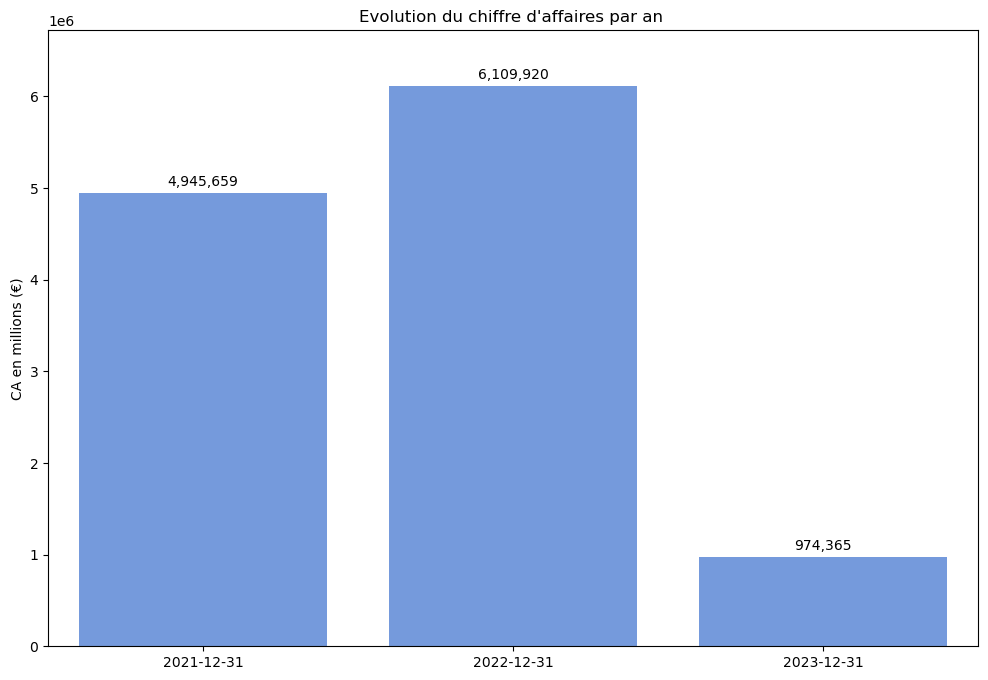

In [56]:
#Visualisation du CA par année
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(ca_annee, x="date", y="price", color="cornflowerblue")
plt.title("Evolution du chiffre d'affaires par an ")
plt.ylabel("CA en millions (€)")
plt.xlabel("")
ax.bar_label(ax.containers[0], label_type="edge", padding=3, fmt='{:,.0f}')
ax.margins(y=0.1)
plt.show()

In [57]:
# Chiffre d'affaires réalisé par mois 
ca_mois=df_liaison2["price"].resample("M").sum()
ca_mois

date
2021-03-31    482533.49
2021-04-30    476253.78
2021-05-31    493026.03
2021-06-30    484160.80
2021-07-31    482876.68
2021-08-31    482377.67
2021-09-30    507364.52
2021-10-31    494805.40
2021-11-30    516270.93
2021-12-31    525989.52
2022-01-31    525390.59
2022-02-28    535685.02
2022-03-31    515570.05
2022-04-30    493143.42
2022-05-31    517297.72
2022-06-30    496088.36
2022-07-31    510906.96
2022-08-31    506549.83
2022-09-30    494207.41
2022-10-31    508020.97
2022-11-30    496778.46
2022-12-31    510281.42
2023-01-31    517612.79
2023-02-28    456752.00
Freq: M, Name: price, dtype: float64

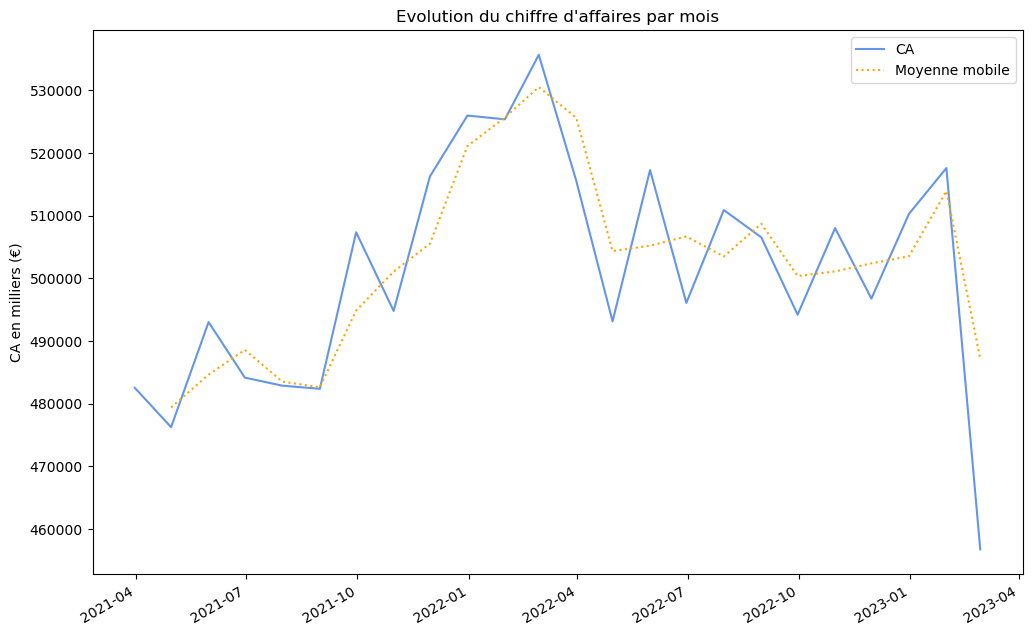

In [58]:
# Visualisation du chiffre d'affaire par mois avec moyenne mobile

plt.figure(figsize=(12,8))
sns.lineplot(ca_mois, color="cornflowerblue", label="CA")
ca_mois.rolling(2, center=True).mean().plot(ls=":", color="orange", label="Moyenne mobile")
plt.title("Evolution du chiffre d'affaires par mois")

plt.ylabel("CA en milliers (€)")
plt.xlabel("")
plt.legend()
plt.show()


In [59]:
#Chiffre d'affaires réalisé  par an par catégorie

ca_categ_annee = df_liaison2.groupby("categ")

ca_categ_annee = ca_categ_annee["price"].resample("Y").sum().reset_index()


# Mettre la colonne date au format date
ca_categ_annee["date"] = ca_categ_annee["date"].dt.date

ca_categ_annee

,categ,date,price
0,0.0,2021-12-31,1883918.29
1,0.0,2022-12-31,2194208.86
2,0.0,2023-12-31,343884.54
3,1.0,2021-12-31,1951930.27
4,1.0,2022-12-31,2485275.19
5,1.0,2023-12-31,390451.65
6,2.0,2021-12-31,1109810.26
7,2.0,2022-12-31,1430436.16
8,2.0,2023-12-31,240028.60


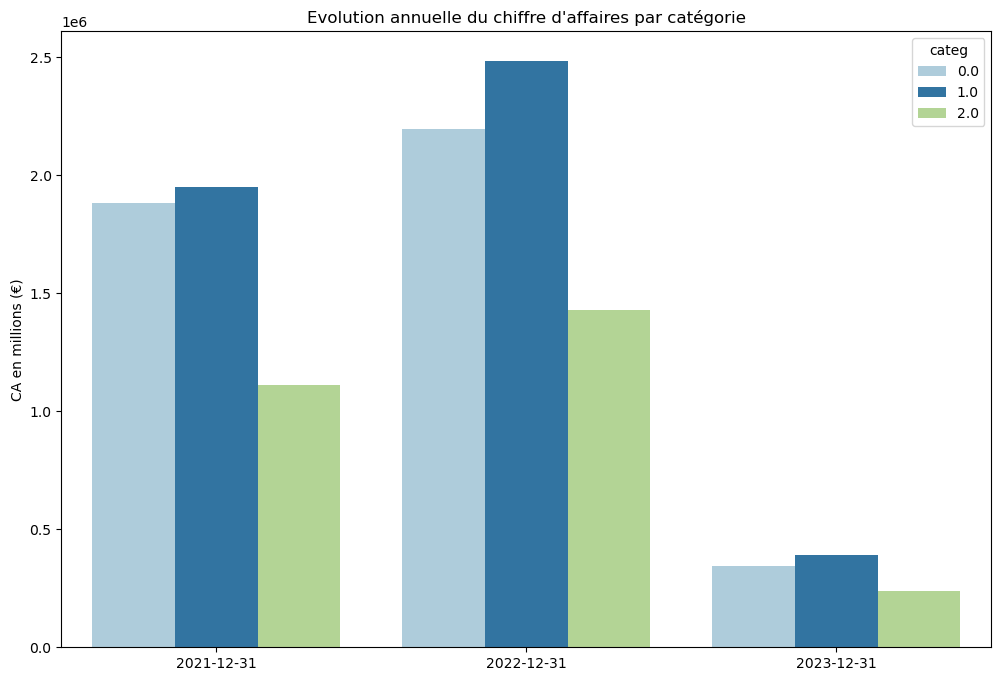

In [60]:
#Visualisation du CA par an par catégorie
plt.figure(figsize=(12,8))
sns.barplot(ca_categ_annee, x="date", y="price", hue="categ", palette=("Paired"))
plt.title("Evolution annuelle du chiffre d'affaires par catégorie")
plt.ylabel("CA en millions (€)")
plt.xlabel("")
plt.show()

In [62]:
#Ca par catégorie par mois
ca_categ_mois = df_liaison2.groupby("categ")

ca_categ_mois = ca_categ_mois["price"].resample("M").sum().reset_index()


ca_categ_mois = pd.pivot_table(ca_categ_mois, index="date", columns="categ", values="price")


# Conversion de l'index au format date
ca_categ_mois.index = ca_categ_mois.index.date
ca_categ_mois

categ,0.0,1.0,2.0
2021-03-31,193722.05,186974.17,101837.27
2021-04-30,205366.94,156138.35,114748.49
2021-05-31,196269.28,165893.40,130863.35
2021-06-30,168015.39,189162.04,126983.37
2021-07-31,144792.07,188523.27,149561.34
2021-08-31,167830.50,162991.38,151555.79
2021-09-30,246477.75,190613.78,70272.99
2021-10-31,199323.07,207696.74,87785.59
2021-11-30,156012.76,252910.39,107347.78
2021-12-31,206108.48,251026.75,68854.29


<Figure size 1200x800 with 0 Axes>

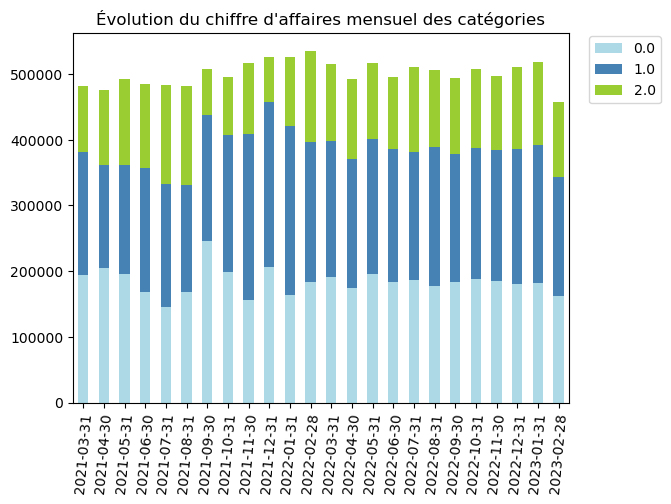

In [69]:
#Visualisation du CA par mois pour chaque catégorie

plt.figure(figsize=(12,8))
ca_categ_mois.plot(kind="bar",stacked=True , color=["lightblue","steelblue","yellowgreen"])
plt.legend(bbox_to_anchor=(1.2,0.9),loc=5)
plt.title("Évolution du chiffre d'affaires mensuel des catégories")
plt.xticks(rotation=85)
plt.show();


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 2.3 - Nombre de client par mois</h3>
</div>

In [70]:
#Grouper les clients par mois 
clts_mois = df_liaison2["client_id"].resample("M").nunique()

clts_mois

date
2021-03-31    5676
2021-04-30    5674
2021-05-31    5644
2021-06-30    5659
2021-07-31    5672
2021-08-31    5642
2021-09-30    5693
2021-10-31    6190
2021-11-30    5875
2021-12-31    5867
2022-01-31    5809
2022-02-28    5729
2022-03-31    5835
2022-04-30    5695
2022-05-31    5845
2022-06-30    5717
2022-07-31    5779
2022-08-31    5805
2022-09-30    5738
2022-10-31    5755
2022-11-30    5749
2022-12-31    5766
2023-01-31    5828
2023-02-28    5588
Freq: M, Name: client_id, dtype: int64

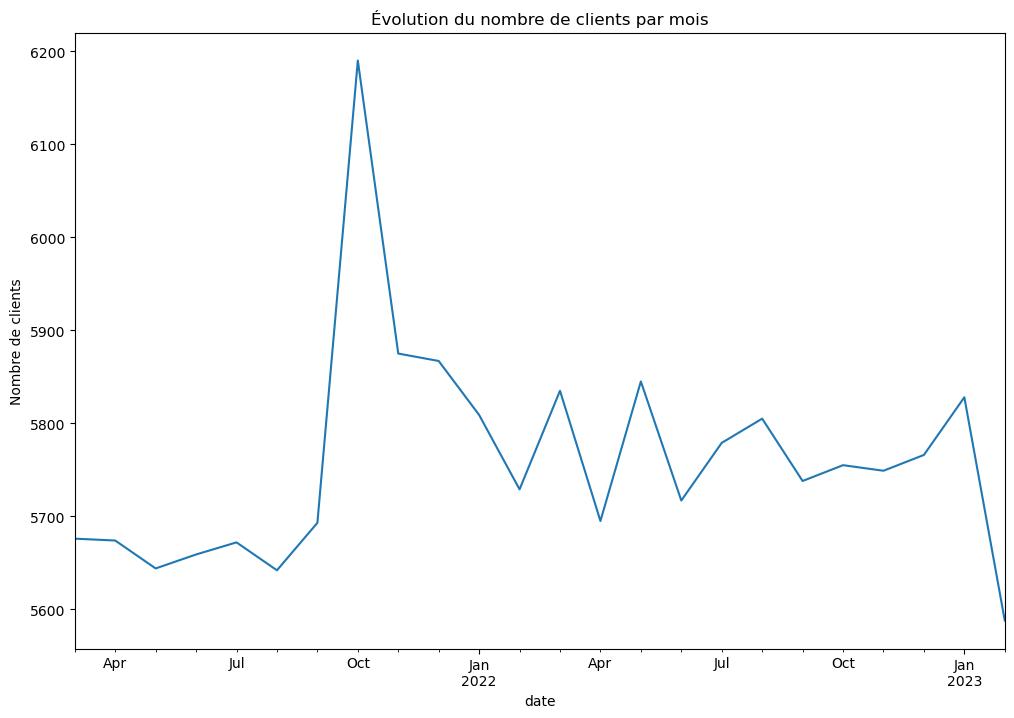

In [71]:
plt.figure(figsize=(12,8))
plt.title("Évolution du nombre de clients par mois")
plt.ylabel("Nombre de clients")
plt.xlabel("")
clts_mois.plot()
plt.show()

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 2.4 - Nombre de transactions</h3>
</div>

In [72]:
# Calcul du nombre de transactions totales sur 2021
nbr_transactions = df_liaison2["session_id"].nunique()
print("Il y a eu", nbr_transactions, "transactions au total")

Il y a eu 345545 transactions au total


In [73]:
#Nombre de transactions par an
transactions_annee = df_liaison2["session_id"].resample("y").nunique()
transactions_annee

date
2021-12-31    143114
2022-12-31    174602
2023-12-31     27832
Freq: A-DEC, Name: session_id, dtype: int64

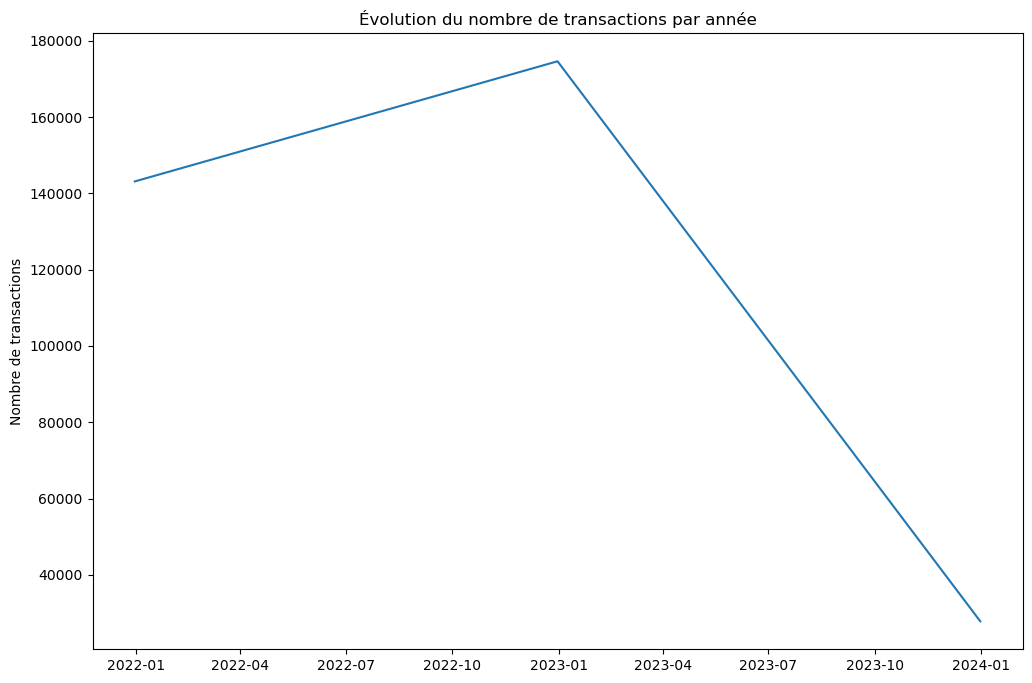

In [74]:
#Visualisation du nombres de transactions par an
plt.figure(figsize=(12,8))
plt.title("Évolution du nombre de transactions par année")
sns.lineplot(transactions_annee)
plt.ylabel("Nombre de transactions")
plt.xlabel("")
plt.show()

In [75]:
#Nombre de transactions par mois 
transactions_mois = df_liaison2["session_id"].resample("M").nunique()
transactions_mois

date
2021-03-31    14203
2021-04-30    13972
2021-05-31    14169
2021-06-30    13839
2021-07-31    13573
2021-08-31    13593
2021-09-30    14850
2021-10-31    14783
2021-11-30    14608
2021-12-31    15567
2022-01-31    14979
2022-02-28    14339
2022-03-31    14827
2022-04-30    14086
2022-05-31    14960
2022-06-30    14391
2022-07-31    14653
2022-08-31    14587
2022-09-30    14264
2022-10-31    14660
2022-11-30    14226
2022-12-31    14635
2023-01-31    14758
2023-02-28    13074
Freq: M, Name: session_id, dtype: int64

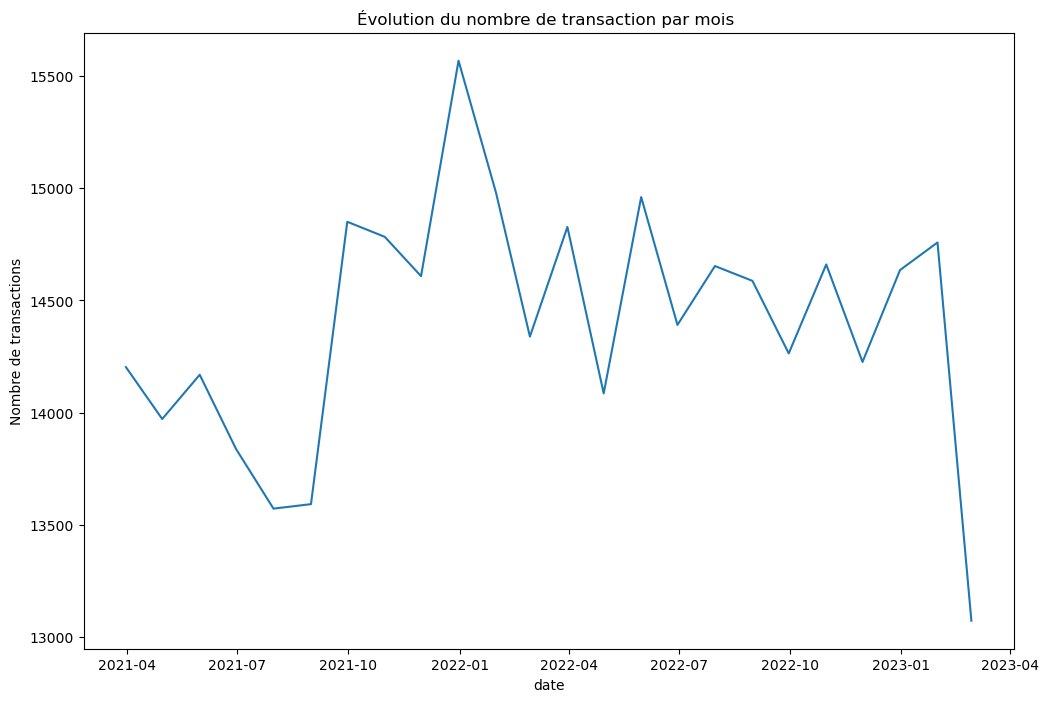

In [76]:
#Visualisation du nombre de transactions par mois 
plt.figure(figsize=(12,8))
plt.title("Évolution du nombre de transaction par mois ")
plt.ylabel("Nombre de transactions")
plt.xlabel("")
sns.lineplot(transactions_mois)
plt.show()

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 2.5 - Nombre de produits vendus</h3>
</div>

In [77]:
#Nombre total de produits vendus
df_liaison2["id_prod"].count()

687755

In [78]:
# Compter le nombre de produits uniques vendus 
df_liaison2["id_prod"].nunique()

3266

In [79]:
# Nombre de produits vendus par mois 
df_liaison2["id_prod"].resample("M").count()

date
2021-03-31    28610
2021-04-30    28457
2021-05-31    28293
2021-06-30    26857
2021-07-31    24742
2021-08-31    25659
2021-09-30    33326
2021-10-31    30029
2021-11-30    28321
2021-12-31    32464
2022-01-31    29348
2022-02-28    29605
2022-03-31    29707
2022-04-30    27616
2022-05-31    29991
2022-06-30    28511
2022-07-31    28682
2022-08-31    28552
2022-09-30    28315
2022-10-31    28974
2022-11-30    28574
2022-12-31    28625
2023-01-31    28945
2023-02-28    25552
Freq: M, Name: id_prod, dtype: int64

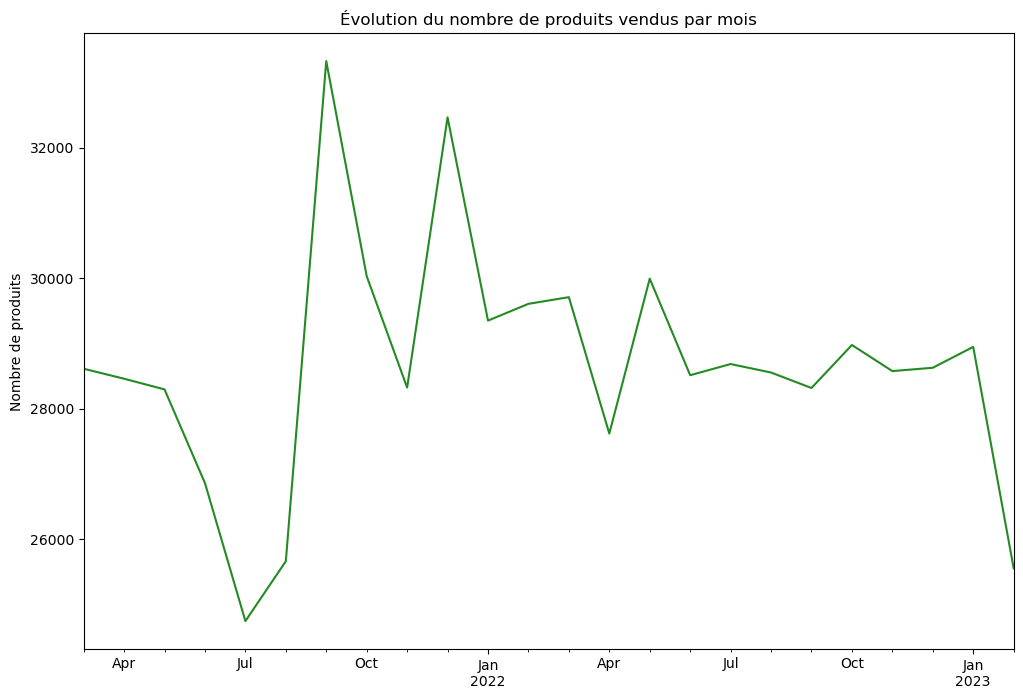

In [80]:
#Visualisation du nombre de produits vendus par mois
plt.figure(figsize=(12,8))
plt.title("Évolution du nombre de produits vendus par mois")
df_liaison2["id_prod"].resample("M").count().plot(c="forestgreen")
plt.ylabel("Nombre de produits")
plt.xlabel("")
plt.show()

<div style="display: flex; background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 30px; "> PARTIE 3 : Zoom sur les références  </h2>
</div
   

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 3.1 - Produits vendus en quantité</h3>
</div>

In [81]:
#Produits les plus vendus en quantité
produits_vendus_qte = df_liaison2.groupby("id_prod", as_index=False)["categ"].count()

produits_vendus_qte

,id_prod,categ
0,0_0,1242
1,0_1,487
2,0_10,22
3,0_100,3
4,0_1000,432
...,...,...
3261,2_95,4
3262,2_96,598
3263,2_97,13
3264,2_98,1


In [82]:
# Top 10 des produits vendus en quantité
top_10_qte = produits_vendus_qte.nlargest(columns="categ", n=10)

top_10_qte

,id_prod,categ
2592,1_369,2340
2645,1_417,2269
2642,1_414,2246
2734,1_498,2202
2654,1_425,2163
2630,1_403,2040
2641,1_413,2036
2640,1_412,2014
2633,1_406,2003
2634,1_407,2001


<Axes: title={'center': 'Les 10 produits les plus vendus en quantité'}, xlabel='id_prod', ylabel='categ'>

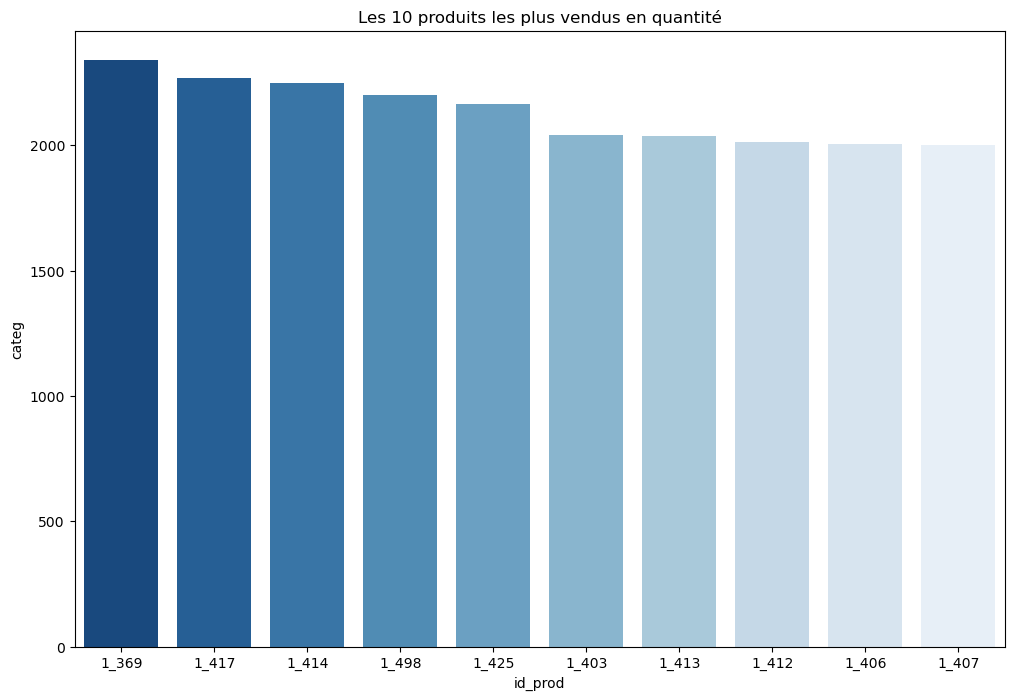

In [83]:
#Visualisation des 10 top produits
plt.figure(figsize=(12,8))
plt.title("Les 10 produits les plus vendus en quantité")
plt.ylabel("Quantités")
plt.xlabel("")
sns.barplot(top_10_qte,x="id_prod",y="categ", palette="Blues_r")

In [84]:
# 10 Produits les moins vendus en  quantités
flop_10_qte =produits_vendus_qte.nsmallest(columns="categ", n=10)
flop_10_qte

,id_prod,categ
166,0_1151,1
313,0_1284,1
417,0_1379,1
549,0_1498,1
595,0_1539,1
665,0_1601,1
698,0_1633,1
752,0_1683,1
802,0_1728,1
1327,0_2201,1


Text(0, 0.5, 'Quantité vendue')

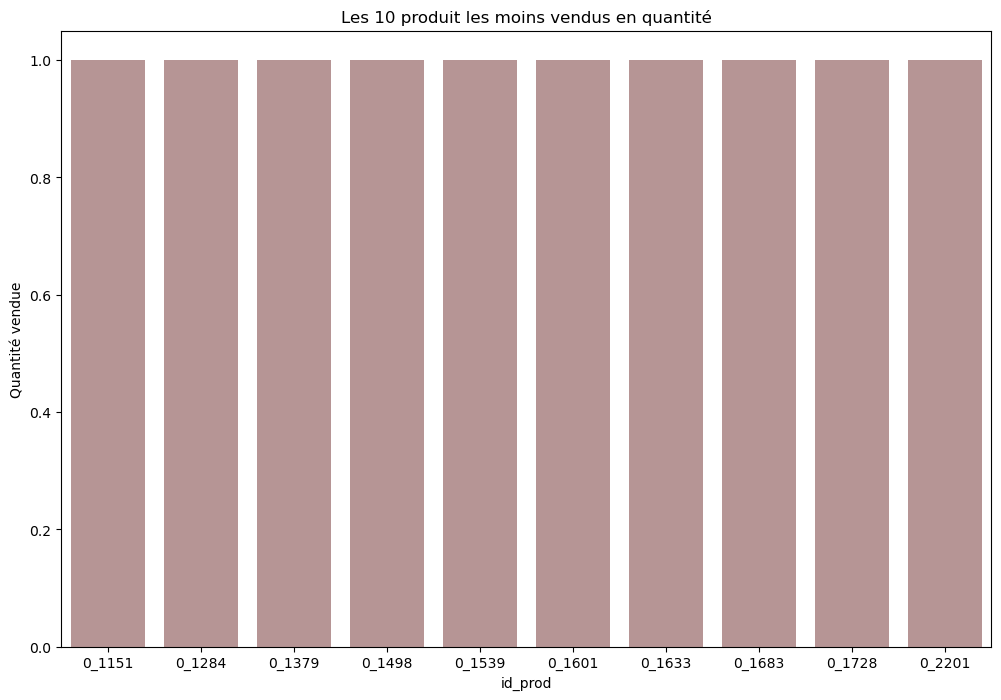

In [85]:
#Visualisation des 10 produits les moins vendus en quantité
plt.figure(figsize=(12,8))
plt.title("Les 10 produit les moins vendus en quantité")
sns.barplot(flop_10_qte, x="id_prod",y="categ", color="rosybrown")
plt.ylabel("Quantité vendue")

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 3.2 - Produits vendus en CA</h3>
</div>

In [86]:
# 10 Produits qui ont généré le plus de CA
top_produits_ca = df_liaison2.groupby("id_prod",as_index=False)["price"].sum().sort_values(by="price", ascending=False)
top_10_ca = top_produits_ca.nlargest(columns="price",n=10)
top_10_ca

,id_prod,price
3097,2_159,94893.50
3071,2_135,69334.95
3046,2_112,65407.76
3035,2_102,60736.78
3153,2_209,56971.86
2620,1_395,56617.47
2592,1_369,56136.60
3044,2_110,53846.25
2608,1_383,53834.43
2642,1_414,53522.18


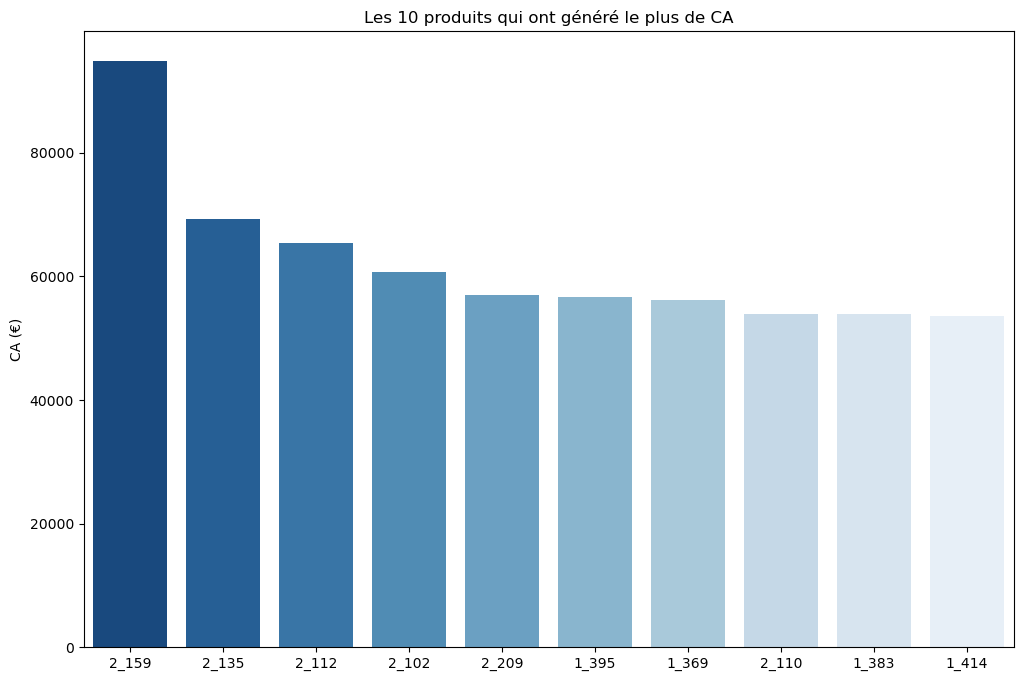

In [87]:
#visualisation des 10 produits qui ont le plus généré de CA
plt.figure(figsize=(12,8))
sns.barplot(top_10_ca,x="id_prod",y="price", palette="Blues_r")
plt.title("Les 10 produits qui ont généré le plus de CA")
plt.ylabel("CA (€)")
plt.xlabel("")

plt.show()

In [88]:
#10 Produit qui ont généré le moins de CA
flop_10_ca =top_produits_ca.nsmallest(columns="price",n=10)
flop_10_ca

,id_prod,price
595,0_1539,0.99
313,0_1284,1.38
719,0_1653,1.98
2080,0_807,1.99
665,0_1601,1.99
1785,0_541,1.99
802,0_1728,2.27
549,0_1498,2.48
2180,0_898,2.54
925,0_1840,2.56


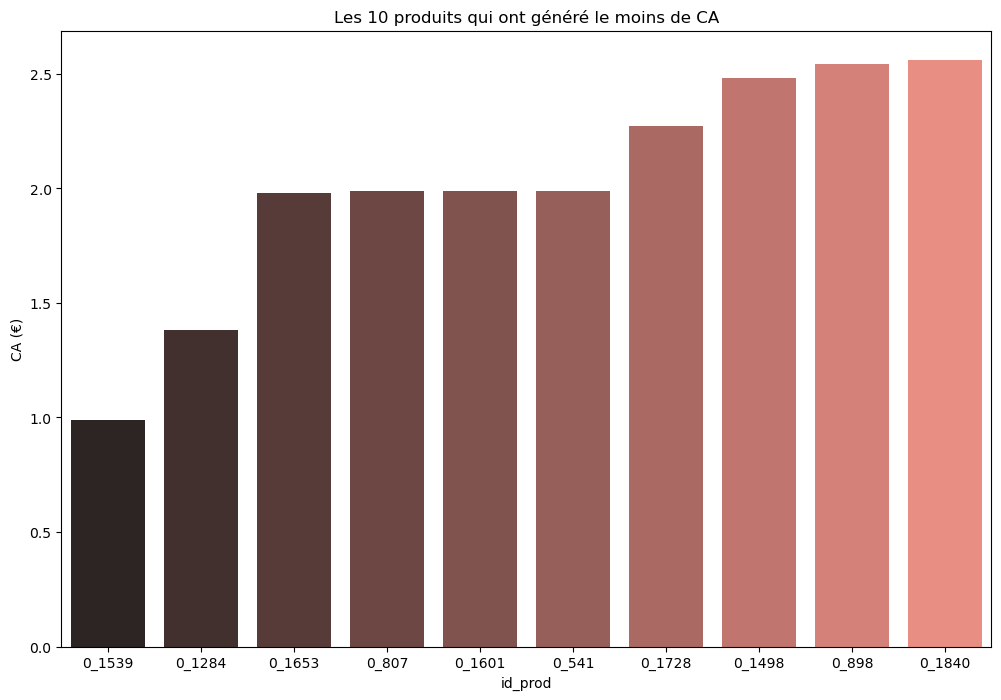

In [89]:
#Visualisation des 10 produits qui généréle moins de CA
plt.figure(figsize=(12,8))
plt.title("Les 10 produits qui ont généré le moins de CA")
sns.barplot(flop_10_ca,x="id_prod",y="price", palette="dark:salmon")
plt.ylabel("CA (€)")
plt.show()

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 3.3 - Répartition des produits vendus par catégorie</h3>
</div>

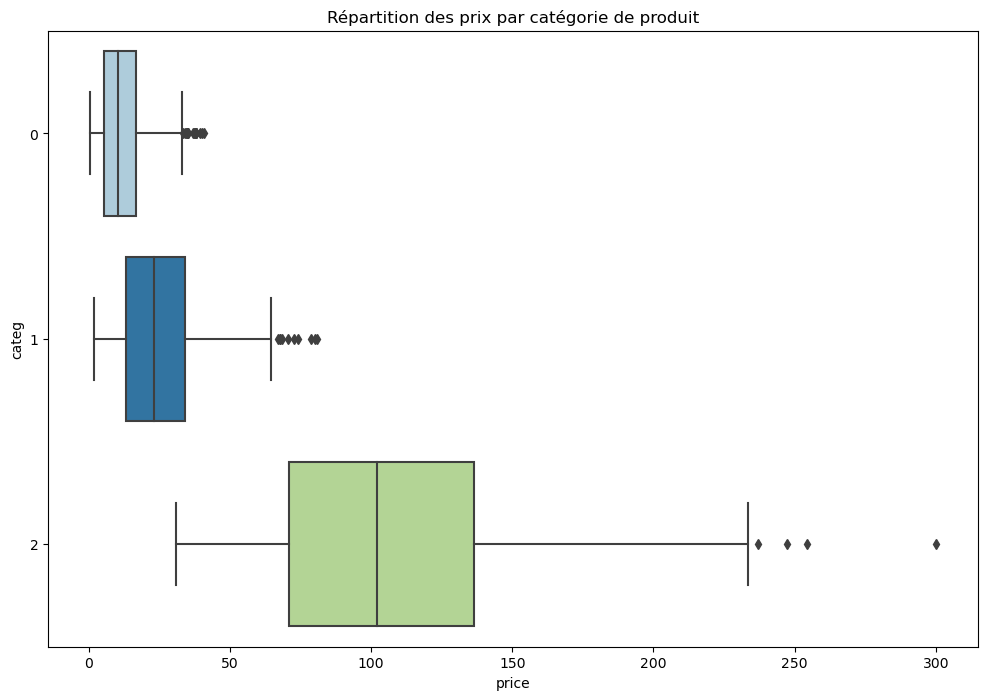

In [90]:
#Répartition des prix par catégorie

plt.figure(figsize=(12,8))
sns.boxplot(x=products["price"],y=products["categ"], orient="h",palette="Paired")
plt.title("Répartition des prix par catégorie de produit")

plt.show()

In [91]:
#Nombre de produits vendus par catégorie 
produits_categ_qte= df_liaison2.groupby("categ", as_index=False)["id_prod"].count()
produits_categ_qte

,categ,id_prod
0,0.0,415680
1,1.0,235592
2,2.0,36483


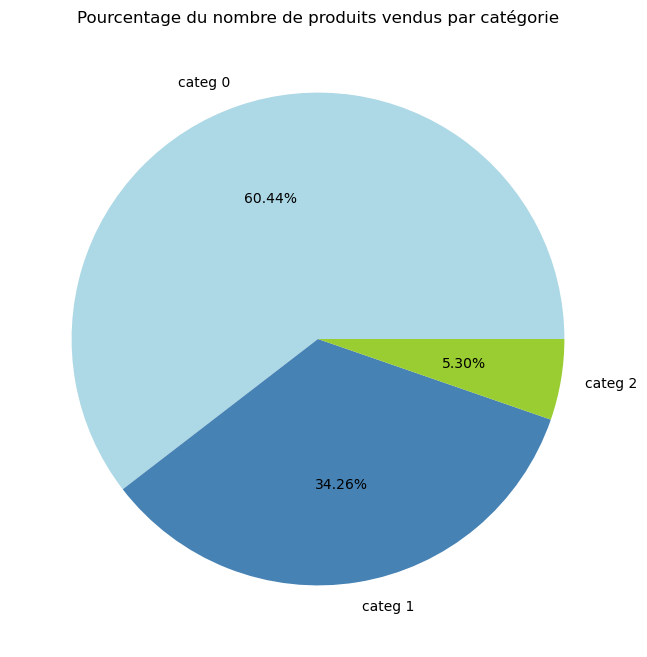

In [92]:
# Visualisation des produits vendus par catégorie en quantité
plt.figure(figsize=(12,8))
plt.title("Pourcentage du nombre de produits vendus par catégorie")
plt.pie(x=produits_categ_qte["id_prod"], labels=["categ 0","categ 1","categ 2"], autopct="%.2f%%", 
        colors=["lightblue","steelblue","yellowgreen"])
plt.show()

In [93]:
# Visualisation du pourcentage du nombre de produits vendus par catégorie
ca_produits_categ= df_liaison2.groupby("categ", as_index=False).agg(CA_total=("price","sum"))
ca_produits_categ

,categ,CA_total
0,0.0,4422011.69
1,1.0,4827657.11
2,2.0,2780275.02


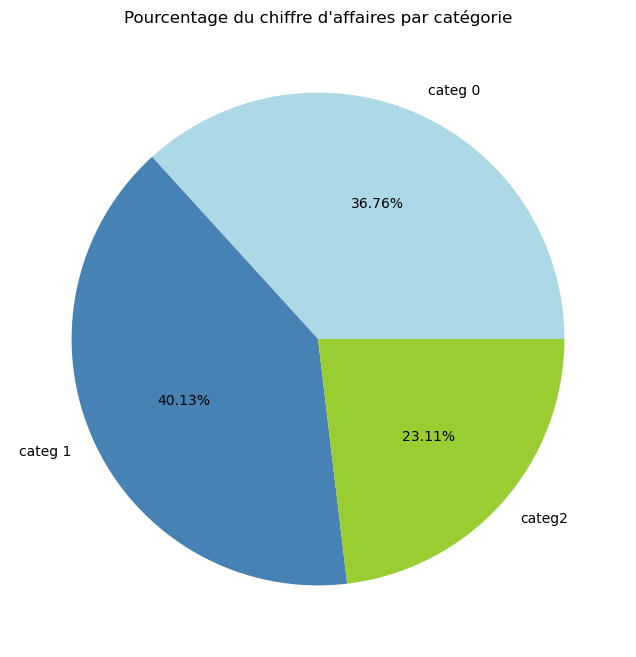

In [94]:
#Visualisation du Ca par catégorie
plt.figure(figsize=(12,8))
plt.title("Pourcentage du chiffre d'affaires par catégorie")
plt.pie(x=ca_produits_categ["CA_total"], labels=["categ 0","categ 1","categ2"], autopct="%.2f%%", 
        colors=["lightblue","steelblue","yellowgreen"])
plt.show()

<div style="display: flex; background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 30px; "> PARTIE 4 : Zoom sur les clients  </h2>
</div
   

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 4.1 - Profil des clients</h3>
</div>

In [95]:
#Création de la colonne âge pour les clients
df_liaison2["age"] = df_liaison2.index.year - df_liaison2["birth"]

df_liaison2

,client_id,sex,birth,id_prod,session_id,price,categ,age
date,,,,,,,,
2021-03-01 00:01:07.843138,c_329,F,1967.0,0_1259,s_1,11.99,0.0,54.0
2021-03-01 00:02:26.047414,c_664,M,1960.0,0_1390,s_2,19.37,0.0,61.0
2021-03-01 00:02:38.311413,c_580,M,1988.0,0_1352,s_3,4.50,0.0,33.0
2021-03-01 00:04:54.559692,c_7912,F,1989.0,0_1458,s_4,6.55,0.0,32.0
2021-03-01 00:05:18.801198,c_2033,F,1956.0,0_1358,s_5,16.49,0.0,65.0
...,...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,c_3573,F,1996.0,1_508,s_348444,21.92,1.0,27.0
2023-02-28 23:51:29.318531,c_50,F,1994.0,2_37,s_348445,48.99,2.0,29.0
2023-02-28 23:53:18.929676,c_488,F,1985.0,1_695,s_348446,26.99,1.0,38.0


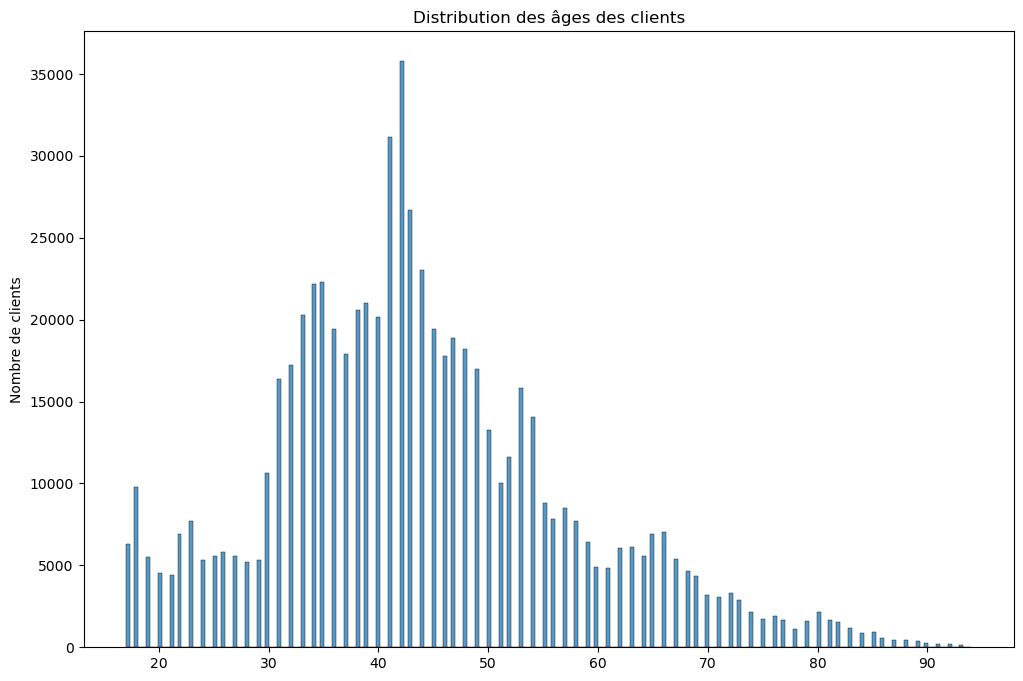

In [96]:
# Visualisation du nombre de clients par âge

#Trier la colonne âge 
#clients_age = df_liaison2["age"].sort_values().reset_index()


# Distribution des âges
plt.figure(figsize=(12,8))
sns.histplot(df_liaison2["age"])
plt.title("Distribution des âges des clients")
plt.ylabel("Nombre de clients")
plt.xlabel("")
plt.show()

In [97]:
# Répartiton des clients en genre 

repartition_genre = df_liaison2.groupby("sex", as_index=False).agg(cust_count=("sex","count"))

repartition_genre

,sex,cust_count
0,F,342810
1,M,344945


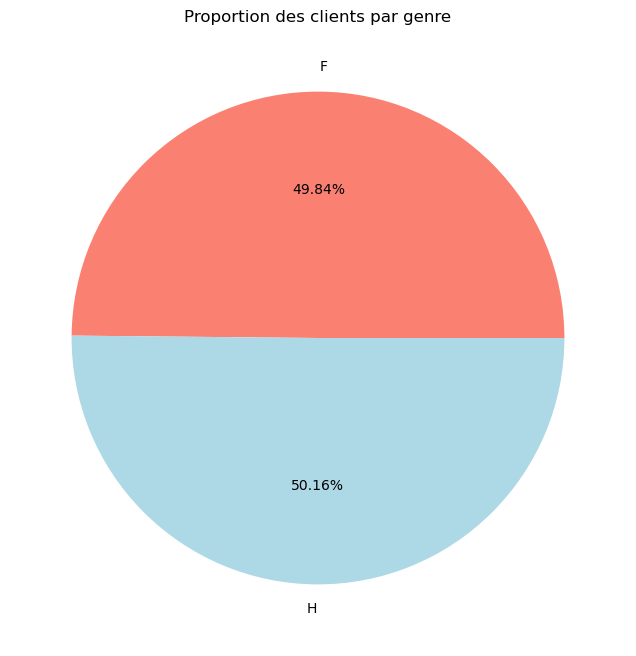

In [98]:
#Visualisation de la répartion des clients en genre
plt.figure(figsize=(12,8))
plt.pie(x=repartition_genre["cust_count"], labels=["F","H"], autopct="%.2f%%", 
        colors=["salmon","lightblue"])
plt.title("Proportion des clients par genre")
plt.show()

In [99]:
#Grouper les clients par genre ainsi que la moyenne des achats par genre

achats_genre = df_liaison2.groupby("sex", as_index=False).agg(purchase_amount=("price","sum"))

achats_genre 



,sex,purchase_amount
0,F,5952051.12
1,M,6077892.70


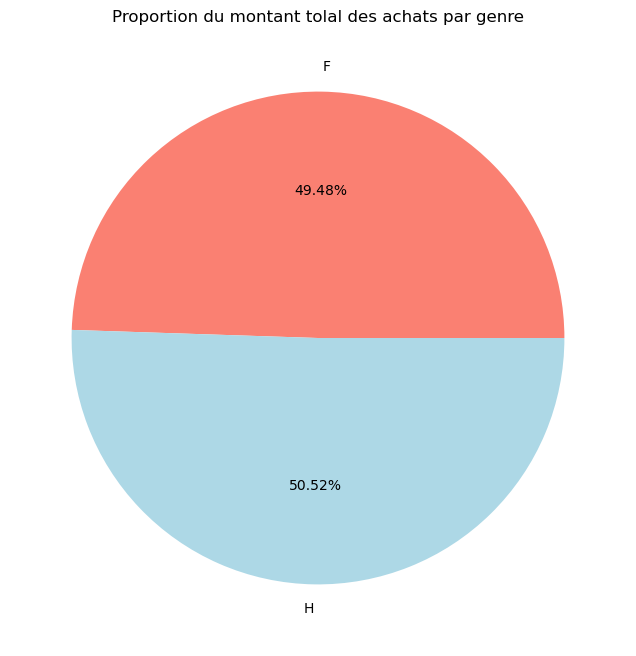

In [100]:
#Visualition du montant total par genre
plt.figure(figsize=(12,8))
plt.pie(x=achats_genre["purchase_amount"], labels=["F","H"], autopct="%.2f%%", 
        colors=["salmon","lightblue"])
plt.title("Proportion du montant tolal des achats par genre")
plt.show()

In [101]:
#CA réalisé par client
ca_client = df_liaison2.groupby("client_id", as_index=False).agg(amount=("price","sum"))

ca_client = ca_client.sort_values("amount",ascending=False)

ca_client

,client_id,amount
677,c_1609,326039.89
4388,c_4958,290227.03
6337,c_6714,153980.52
2724,c_3454,114141.53
634,c_1570,5285.82
...,...,...
3855,c_4478,13.36
4044,c_4648,11.20
7889,c_8114,9.98
7918,c_8140,8.30


In [102]:
# 10 clients qui ont généré le plus de CA
top_10_clients = ca_client.nlargest(columns="amount",n=10)

top_10_clients

,client_id,amount
677,c_1609,326039.89
4388,c_4958,290227.03
6337,c_6714,153980.52
2724,c_3454,114141.53
634,c_1570,5285.82
2513,c_3263,5276.87
1268,c_2140,5260.18
2108,c_2899,5214.05
7006,c_7319,5155.77
7715,c_7959,5135.75


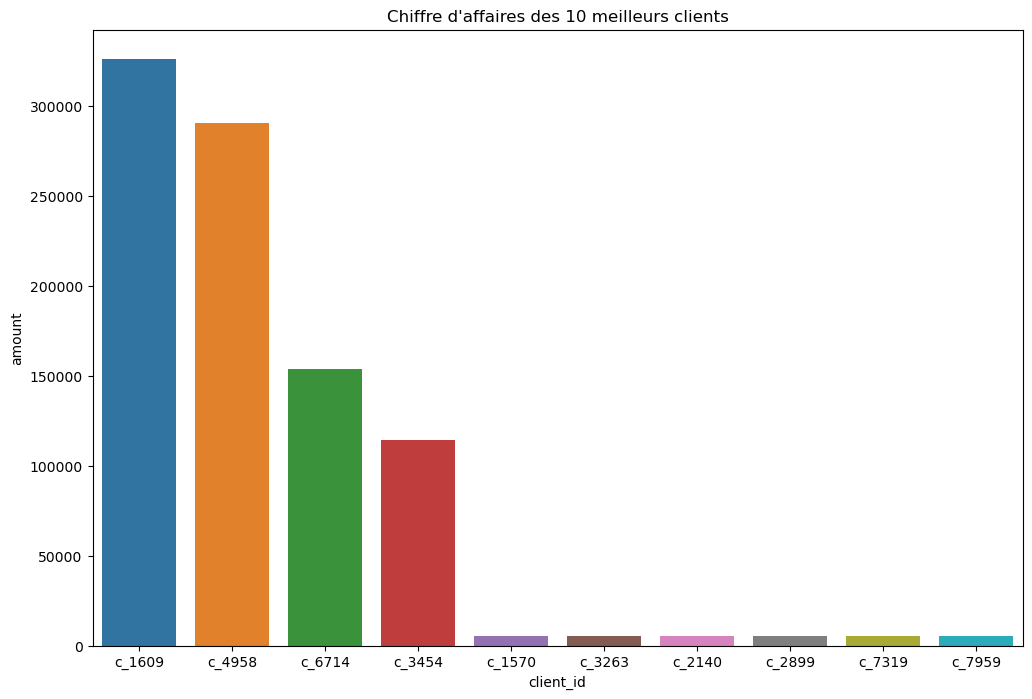

In [103]:
#Visualisation des top 10 clients
plt.figure(figsize=(12,8))
sns.barplot(top_10_clients,x="client_id", y="amount")
plt.title("Chiffre d'affaires des 10 meilleurs clients")
plt.show()

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 4.2 - Clients BtoB</h3>
</div>

In [104]:
#Identification des clients BtoB qui ont généré un CA sup à 100 000 €
btob = ca_client.nlargest(columns="amount",n=4)
btob

,client_id,amount
677,c_1609,326039.89
4388,c_4958,290227.03
6337,c_6714,153980.52
2724,c_3454,114141.53


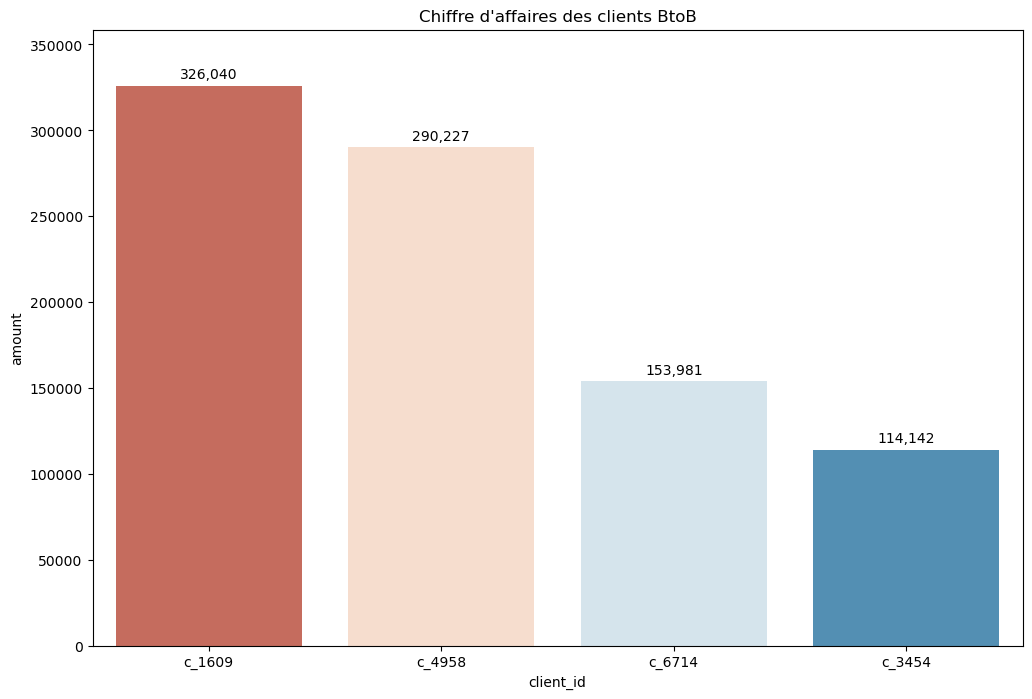

In [105]:
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Chiffre d'affaires des clients BtoB")
sns.barplot(btob, x="client_id", y="amount",palette="RdBu")
ax.bar_label(ax.containers[0],  label_type="edge", padding=3, fmt='{:,.0f}')
ax.margins(y=0.1)
plt.show()

In [106]:
#Clients_btob dataframe 

clients_btb= btob["client_id"].values

clients_btb_df = df_liaison2.loc[df_liaison2["client_id"].isin(clients_btb),:]

clients_btb_df

,client_id,sex,birth,id_prod,session_id,price,categ,age
date,,,,,,,,
2021-03-01 00:07:04.371179,c_1609,M,1980.0,0_1304,s_7,5.86,0.0,41.0
2021-03-01 00:11:57.832228,c_1609,M,1980.0,0_1159,s_7,7.99,0.0,41.0
2021-03-01 01:08:49.803921,c_3454,M,1969.0,0_1431,s_33,10.99,0.0,52.0
2021-03-01 01:56:41.944044,c_1609,M,1980.0,0_1425,s_46,12.99,0.0,41.0
2021-03-01 02:12:21.294004,c_1609,M,1980.0,0_1469,s_53,14.99,0.0,41.0
...,...,...,...,...,...,...,...,...
2023-02-28 22:40:24.405750,c_6714,F,1968.0,0_1333,s_348416,5.99,0.0,55.0
2023-02-28 23:04:51.081903,c_6714,F,1968.0,1_392,s_348416,18.11,1.0,55.0
2023-02-28 23:08:40.035146,c_4958,M,1999.0,2_13,s_348403,50.99,2.0,24.0


In [107]:
#Fréquence d'achat des clients BtoB

btob_freq = clients_btb_df.groupby("client_id")

btob_freq_mois = btob_freq["price"].resample("M").count()

btob_freq_mois = btob_freq_mois.reset_index()

# Mettre la colonne date au format date
btob_freq_mois["date"] = btob_freq_mois["date"].dt.date

btob_freq_mois

,client_id,date,price
0,c_1609,2021-03-31,1083
1,c_1609,2021-04-30,1091
2,c_1609,2021-05-31,1132
3,c_1609,2021-06-30,950
4,c_1609,2021-07-31,829
...,...,...,...
91,c_6714,2022-10-31,392
92,c_6714,2022-11-30,372
93,c_6714,2022-12-31,458
94,c_6714,2023-01-31,400


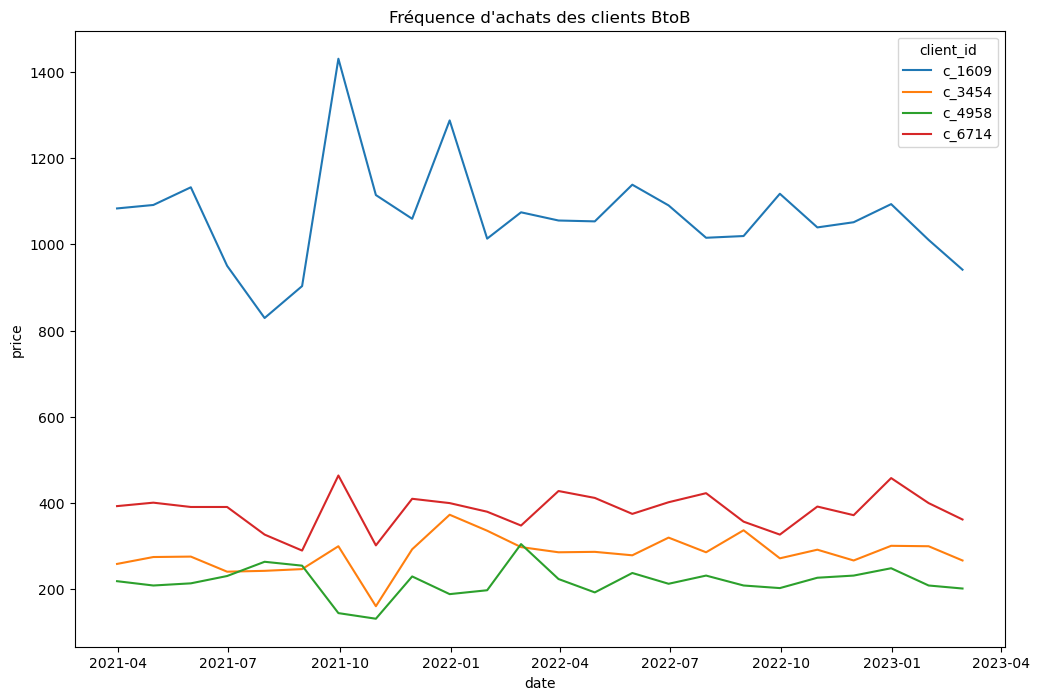

In [108]:
#Visualisation fréquence d'achat des clients btob

plt.figure(figsize=(12,8))
sns.lineplot(btob_freq_mois, x="date", y="price", hue="client_id")
plt.title("Fréquence d'achats des clients BtoB")
plt.show()

In [109]:
#Panier moyen des clients BtoB
btob_freq_mois.groupby("client_id", as_index=False)["price"].mean().sort_values("price")

,client_id,price
2,c_4958,217.583333
1,c_3454,283.166667
3,c_6714,383.541667
0,c_1609,1066.083333


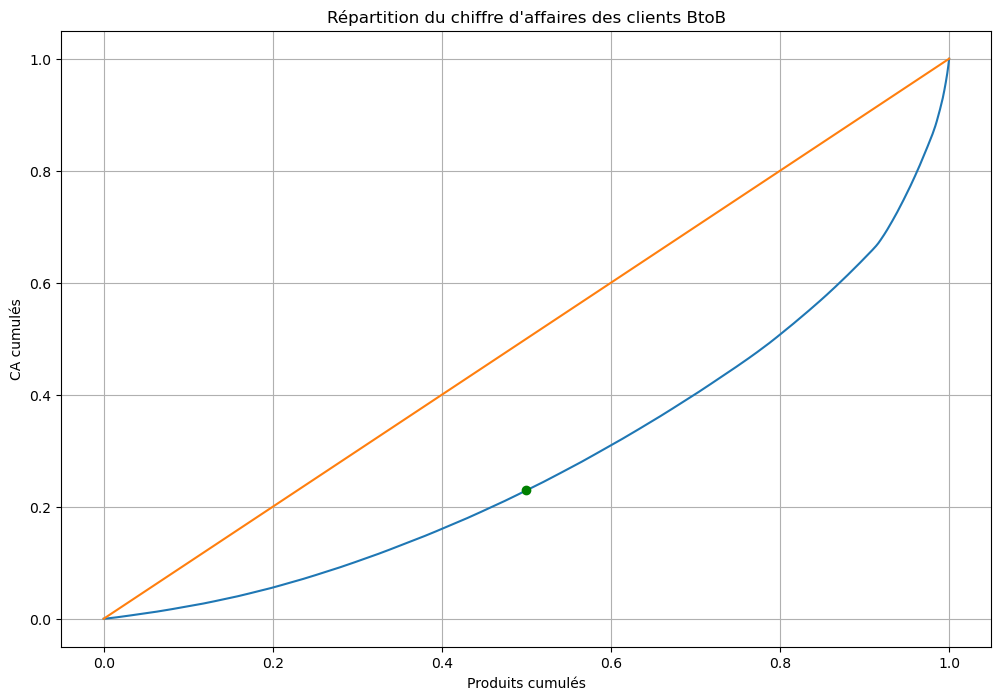

In [110]:
#Répartiton du CA pour les clients BtoB

#Courbe de lorenz
ca= clients_btb_df["price"].values
n=len(ca)
lorenz= np.cumsum(np.sort(ca))/ ca.sum()
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0-1/n,1+1/n,n+1)

#Graphique
plt.figure(figsize=(12,8))
plt.plot(xaxis, lorenz)
plt.plot([0,1],[0,1])
plt.plot(0.5,0.23,"go")
plt.title("Répartition du chiffre d'affaires des clients BtoB")
plt.xlabel("Produits cumulés")
plt.ylabel("CA cumulés")
plt.grid()

In [111]:
#indice de gini
auc= (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n
s= 0.5 - auc
ig= 2*s
ig = round(ig,2)
print("L'indice de gini est égale à",ig)

L'indice de gini est égale à 0.43


In [112]:
#CA total réalisé par les clients BtoB

ca_clients_btob =clients_btb_df["price"].sum()
print("Les clients BtoB ont réalisé un CA total de",round(ca_clients_btob,2),"euros")

#Pourcentage du total
ca_btob_pourcentage = (ca_clients_btob/ca_total)*100

btob_pourc = round(ca_btob_pourcentage,2)
print("Le CA réalisé par les clients btob représente",btob_pourc,"% du chiffre d'affaires totale")

Les clients BtoB ont réalisé un CA total de 884388.97 euros
Le CA réalisé par les clients btob représente 7.35 % du chiffre d'affaires totale


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 4.3 - Clients BtoC</h3>
</div>

In [113]:
# Clients btoc dataframe

btoc = df_liaison2.loc[~df_liaison2["client_id"].isin(clients_btb),:]
btoc

,client_id,sex,birth,id_prod,session_id,price,categ,age
date,,,,,,,,
2021-03-01 00:01:07.843138,c_329,F,1967.0,0_1259,s_1,11.99,0.0,54.0
2021-03-01 00:02:26.047414,c_664,M,1960.0,0_1390,s_2,19.37,0.0,61.0
2021-03-01 00:02:38.311413,c_580,M,1988.0,0_1352,s_3,4.50,0.0,33.0
2021-03-01 00:04:54.559692,c_7912,F,1989.0,0_1458,s_4,6.55,0.0,32.0
2021-03-01 00:05:18.801198,c_2033,F,1956.0,0_1358,s_5,16.49,0.0,65.0
...,...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,c_3573,F,1996.0,1_508,s_348444,21.92,1.0,27.0
2023-02-28 23:51:29.318531,c_50,F,1994.0,2_37,s_348445,48.99,2.0,29.0
2023-02-28 23:53:18.929676,c_488,F,1985.0,1_695,s_348446,26.99,1.0,38.0


In [114]:
#Panier moyen des clients Btoc
btoc.groupby("client_id")["price"].mean().sort_values()

client_id
c_8140      4.150000
c_8032      4.410000
c_8114      4.990000
c_1675      5.570000
c_890       6.080000
             ...    
c_755     124.612500
c_1868    129.695714
c_2369    148.241429
c_4540    181.990000
c_4391    181.990000
Name: price, Length: 8596, dtype: float64

In [115]:
#Les top 10 clients btoc en terme de CA
top_10_btoc = btoc.groupby("client_id").agg(amount=("price","sum")).nlargest(columns="amount",n=10).reset_index()
top_10_btoc

,client_id,amount
0,c_1570,5285.82
1,c_3263,5276.87
2,c_2140,5260.18
3,c_2899,5214.05
4,c_7319,5155.77
5,c_7959,5135.75
6,c_1422,5131.36
7,c_7421,5097.18
8,c_8026,5092.90
9,c_2505,5059.35


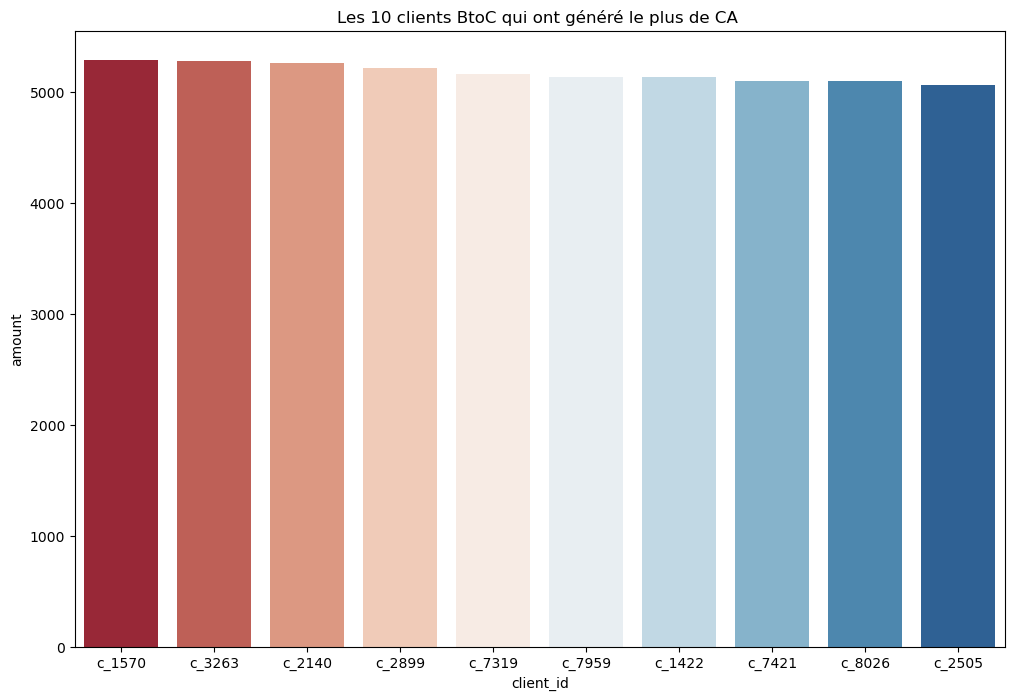

In [116]:
#Visualisation du top 10 des clients btoc
plt.figure(figsize=(12,8))
sns.barplot(top_10_btoc, x="client_id", y="amount", palette="RdBu")
plt.title("Les 10 clients BtoC qui ont généré le plus de CA ")
plt.show()

In [117]:
#Le flop 10 clients btoc en terme de CA
flop_10_btoc = btoc.groupby("client_id").agg(amount=("price","sum")).nsmallest(columns="amount", n=10).reset_index()
flop_10_btoc

,client_id,amount
0,c_8351,6.31
1,c_8140,8.30
2,c_8114,9.98
3,c_4648,11.20
4,c_4478,13.36
5,c_6040,15.72
6,c_5919,15.98
7,c_5829,16.07
8,c_8032,17.64
9,c_4976,17.89


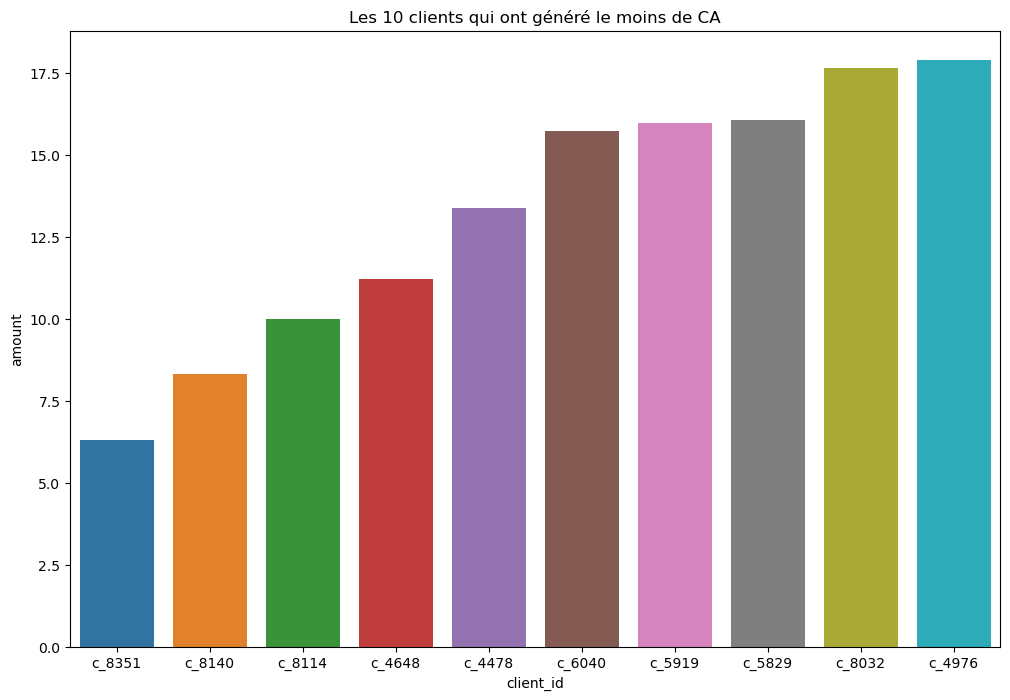

In [118]:
plt.figure(figsize=(12,8))
sns.barplot(flop_10_btoc, x="client_id", y="amount")
plt.title("Les 10 clients qui ont généré le moins de CA")
plt.show()

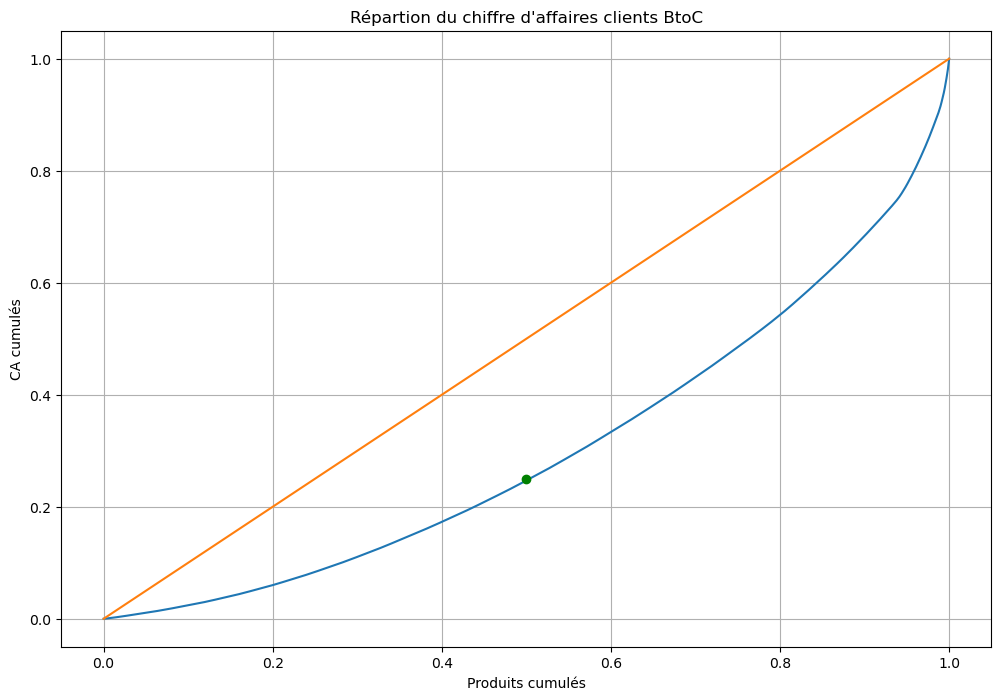

In [119]:
#Répartition du CA client btoc


#Courbe de lorenz
ca= btoc["price"].values
n=len(ca)
lorenz= np.cumsum(np.sort(ca))/ ca.sum()
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0-1/n,1+1/n,n+1)

#Graphique
plt.figure(figsize=(12,8))
plt.title("Répartion du chiffre d'affaires clients BtoC")
plt.plot(xaxis, lorenz)
plt.plot([0,1],[0,1])
plt.plot(0.5,0.25,"go")
plt.xlabel("Produits cumulés")
plt.ylabel("CA cumulés")
plt.grid()

In [120]:
auc = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n
s=0.5 -auc
ig = 2*s
ig= round(ig,2)
print("l'indice de gini est égale à",ig)

l'indice de gini est égale à 0.39


<div style="display: flex; background-color: RGB(233, 150, 122);" >
<h2 style="margin: auto; padding: 30px; "> PARTIE  : Analyses du comportement clients  </h2>
</div
   

<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 5.1 - Lien entre le genre d'un client et les catégories de livres achetés</h3>
</div>

In [121]:
#Tableau de contingence
genre_categ = pd.crosstab(btoc["sex"], btoc["categ"])

genre_categ

categ,0.0,1.0,2.0
sex,,,
F,200904,115721,16980
M,186589,104884,15868


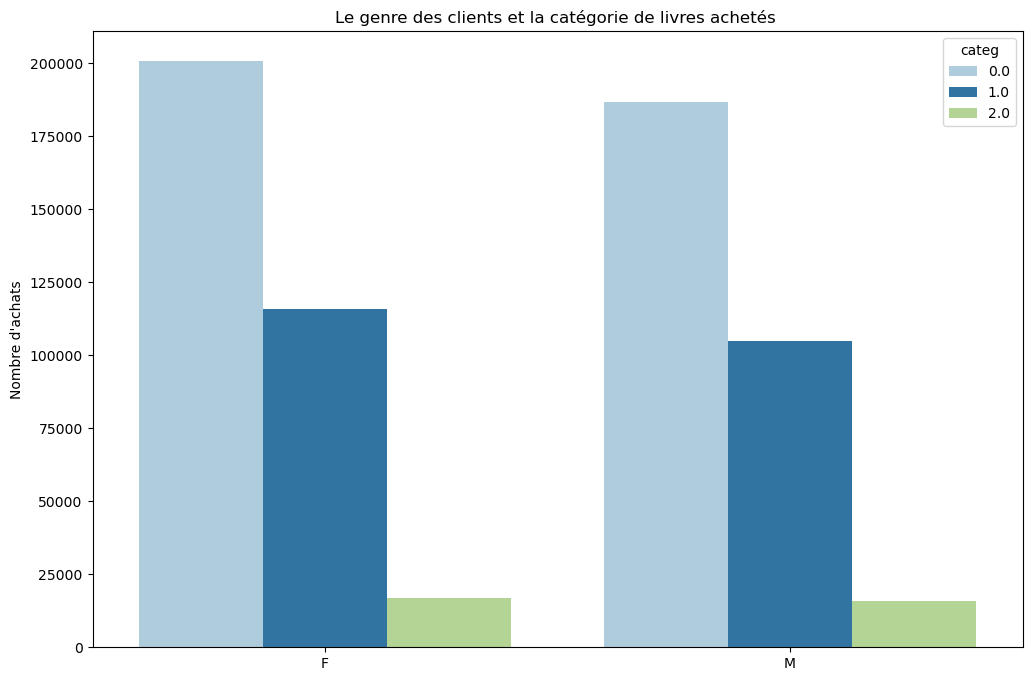

In [122]:
#Graphique 
plt.figure(figsize=(12,8))
plt.title("Le genre des clients et la catégorie de livres achetés ")
sns.countplot(btoc, x="sex", hue="categ", palette="Paired" )
plt.xlabel("")
plt.ylabel("Nombre d'achats")
plt.show()

In [123]:
#Test Chi2 pour deux variables qualitatives 



chi2_stat, chi2_pvalue, dof, expected_freq = stats.chi2_contingency(genre_categ, correction=True)
print("Statistique Chi2 :", chi2_stat)
print("P-value Chi2:", chi2_pvalue)
print("Degré de liberté:", dof)
print("Fréquence attendue:", expected_freq )

Statistique Chi2 : 22.65449364644797
P-value Chi2: 1.204035271527609e-05
Degré de liberté: 2
Fréquence attendue: [[201685.63695694 114822.35792875  17097.00511432]
 [185807.36304306 105782.64207125  15750.99488568]]


In [132]:
#Coefficient de Cramér-V mesure la force de l'association entre deux variable qualitatives

n= genre_categ.sum().sum()
min_dim=min(genre_categ.shape) - 1
cramer_v= np.sqrt(chi2_stat / (n*min_dim))

print("Le coefficient de Cramér-V :",cramer_v)

Le coefficient de Cramér-V : 0.005945199862168547


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 5.2 - Lien entre l'âge des clients et le montant total des achats</h3>
</div>

In [124]:
# Grouper par âge le montant total des achats
age_montant = df_liaison2.groupby("age", as_index=False).agg(purchase_amount=("price","sum"))

age_montant

,age,purchase_amount
0,17.0,248670.29
1,18.0,387077.54
2,19.0,224524.90
3,20.0,179861.79
4,21.0,174482.17
...,...,...
73,90.0,4114.03
74,91.0,3692.37
75,92.0,3337.61
76,93.0,2115.62


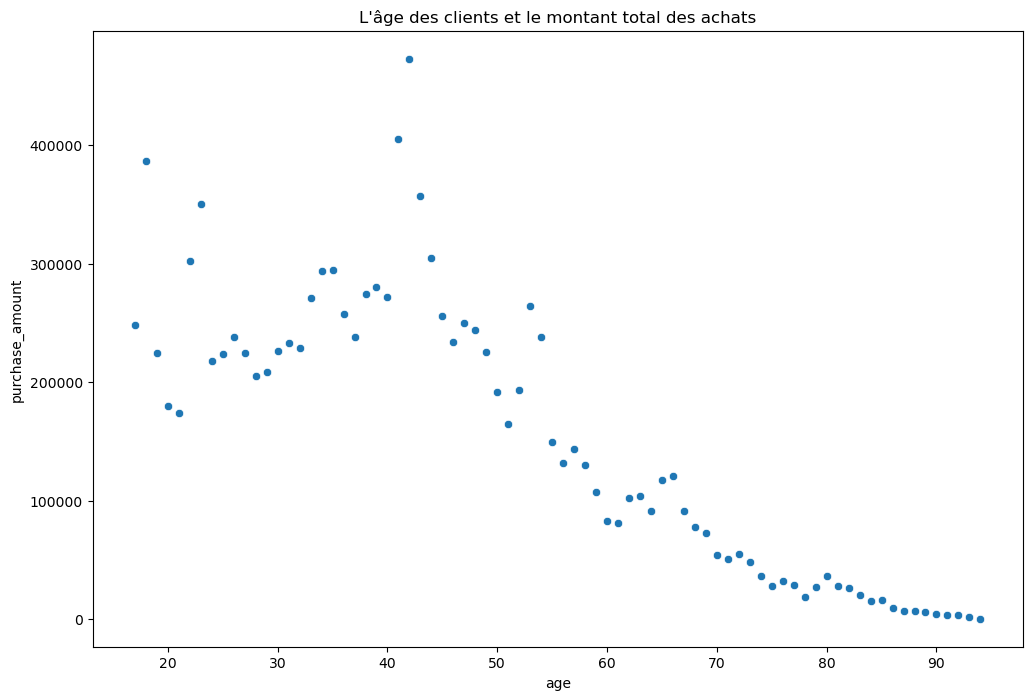

In [125]:
#graphique 
plt.figure(figsize=(12,8))
sns.scatterplot(age_montant, x="age", y="purchase_amount")
plt.title("L'âge des clients et le montant total des achats")
plt.show()

In [126]:
#Test de normalité de l'échantillon pour choisir le test statistique adapté

shapiro_stat, shapiro_pvalue = stats.shapiro(age_montant["age"]) 
print("Statistique Shapiro:", shapiro_stat)
print("P-value Shapiro:", shapiro_pvalue)

#Hypothèse
#HO: La distribution est gaussienne 
#H1 : La distribution est non gaussienne 
#Seuil de significativité 0.05

Statistique Shapiro: 0.9548976421356201
P-value Shapiro: 0.007609581109136343


In [127]:
#Test de Spearman car p_value est inférieure à 0.05, distribution non gaussienne

spearman_stat, spearman_pvalue = stats.spearmanr(age_montant)
print("Statistique Spearman :", spearman_stat)
print("P-value Spearman:", spearman_pvalue)

Statistique Spearman : -0.8727095689121006
P-value Spearman: 2.2574806834006148e-25


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 5.3 - Lien entre l'âge des clients et la fréquence d'achat</h3>
</div>

In [128]:
#Grouper l'âge des clients et la fréquence d'achat

age_frequence = btoc.groupby("age", as_index=False).agg(purchase=("session_id","count"))
age_frequence

,age,purchase
0,17.0,6283
1,18.0,9756
2,19.0,5536
3,20.0,4558
4,21.0,4422
...,...,...
73,90.0,243
74,91.0,222
75,92.0,197
76,93.0,129


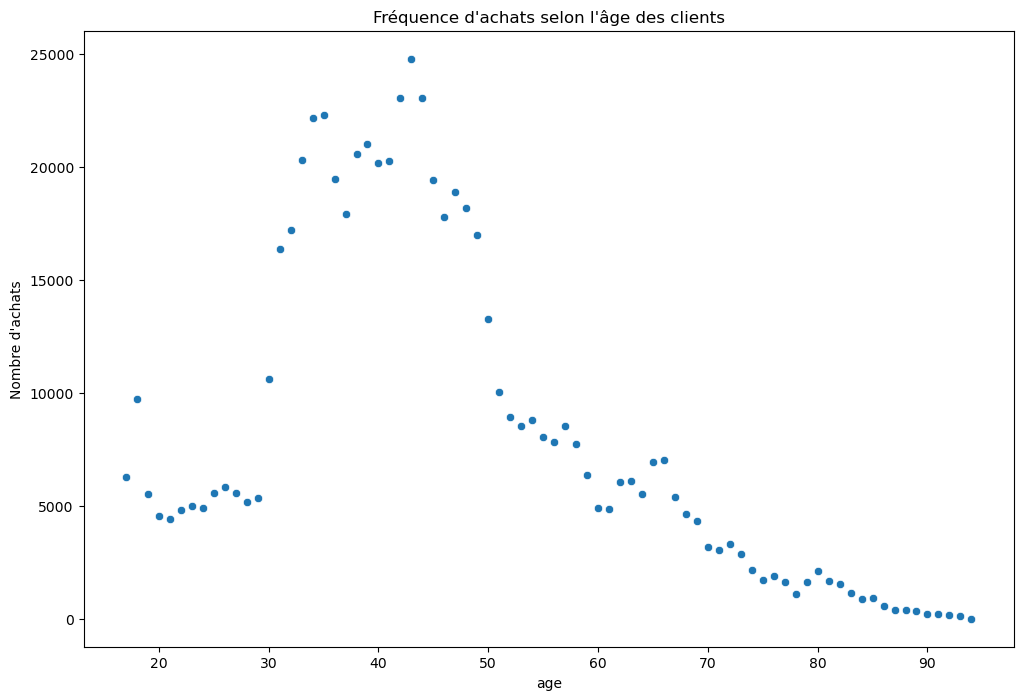

In [129]:
#Graphqiue 
plt.figure(figsize=(12,8))
sns.scatterplot(age_frequence, x="age", y="purchase")
plt.ylabel("Nombre d'achats")
plt.title("Fréquence d'achats selon l'âge des clients")
plt.show()

In [130]:
#Test de normalité 

shapiro_stat, shapiro_pvalue = stats.shapiro(age_frequence["age"])
print("Statistique Shapiro:", shapiro_stat)
print("P-value Shapiro:", shapiro_pvalue)

Statistique Shapiro: 0.9548976421356201
P-value Shapiro: 0.007609581109136343


In [131]:
#Test spearman

spearman_stat, spearman_pvalue = stats.spearmanr(age_frequence)
print("Statistique Spearman :", spearman_stat)
print("P-value Spearman:", spearman_pvalue)

Statistique Spearman : -0.6968942057766555
P-value Spearman: 1.3762148675627782e-12


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 5.4 - Lien entre l'âge des clients et la taille du panier moyen</h3>
</div>

In [132]:
#Grouper par êge et par session le nombre de produit
age_session_pdt = btoc.groupby(["age","session_id"], as_index=False).agg(product_count=("id_prod","count"))

panier_moyen = age_session_pdt.groupby("age", as_index=False).agg(product_mean=("product_count","mean"))


#Creation de la colonne range_age
panier_moyen["age_range"]= pd.cut(panier_moyen["age"], bins=[15,35,55,75,95], labels=["15-35","36-55","56-75","76-95"])

panier_moyen

,age,product_mean,age_range
0,17.0,1.761424,15-35
1,18.0,1.764514,15-35
2,19.0,1.741428,15-35
3,20.0,1.771473,15-35
4,21.0,1.775904,15-35
...,...,...,...
73,90.0,1.500000,76-95
74,91.0,1.819672,76-95
75,92.0,1.387324,76-95
76,93.0,1.500000,76-95


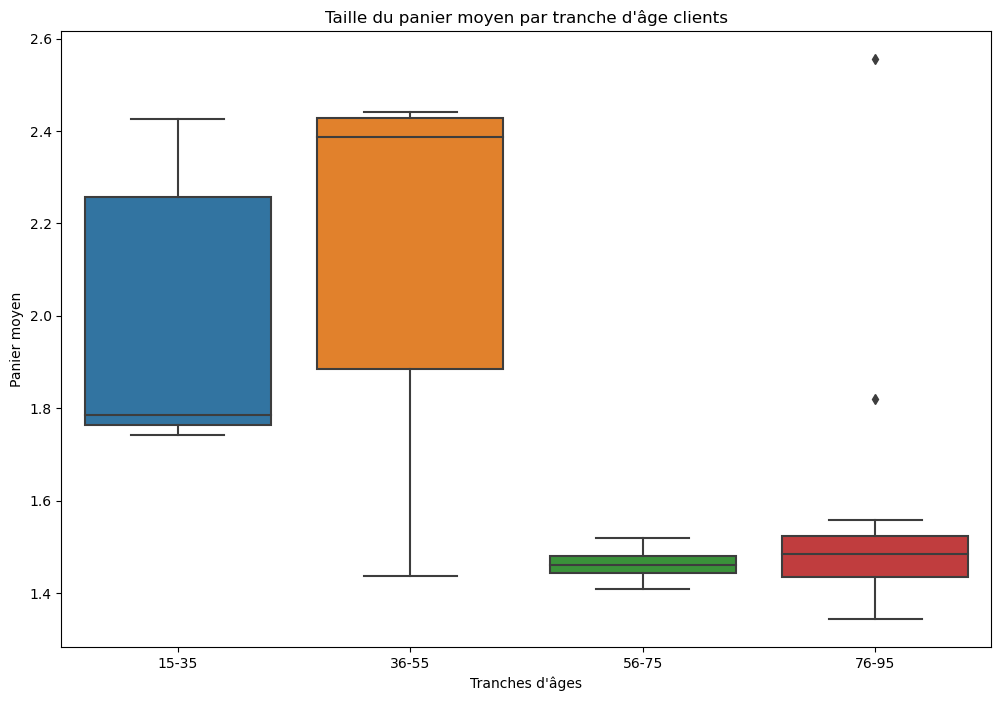

In [133]:
#Visualisation de la taille du panier moyen par tranche d'age
plt.figure(figsize=(12,8))
plt.title("Taille du panier moyen par tranche d'âge clients")
sns.boxplot(x=panier_moyen["age_range"],y=panier_moyen["product_mean"], orient="v")
plt.ylabel("Panier moyen")
plt.xlabel("Tranches d'âges")
plt.show()

In [134]:
#Dataframe comportant les colonnes age_range et product_mean
df_panier_moyen = panier_moyen[["age_range","product_mean"]]
df_panier_moyen

,age_range,product_mean
0,15-35,1.761424
1,15-35,1.764514
2,15-35,1.741428
3,15-35,1.771473
4,15-35,1.775904
...,...,...
73,76-95,1.500000
74,76-95,1.819672
75,76-95,1.387324
76,76-95,1.500000


In [135]:
# Créer les variables pour chaque tranche d'âge et la taille du panier moyen correspondant
fifteen_thirtyfive = df_panier_moyen[df_panier_moyen["age_range"]=="15-35"]["product_mean"]
thirtysix_fiftyfive =df_panier_moyen[df_panier_moyen["age_range"]=="36-55"]["product_mean"]
fiftysix_seventyfive = df_panier_moyen[df_panier_moyen["age_range"]=="56-75"]["product_mean"]
seventysix_ninetyfive = df_panier_moyen[df_panier_moyen["age_range"]=="76-95"]["product_mean"]

In [136]:
#Test de Levene pour analyser l'égalité des variances

levene_stat, levene_pvalue = stats.levene(fifteen_thirtyfive,thirtysix_fiftyfive,fiftysix_seventyfive,seventysix_ninetyfive)
print("Statistique W Levene :",levene_stat)
print("P-valeur Levene :", levene_pvalue )

Statistique W Levene : 2.9296200031427833
P-valeur Levene : 0.039125852719571697


In [137]:
#Test Kruskal-Wallis
kruskal_stat, kruskal_pvalue = stats.kruskal(fifteen_thirtyfive,thirtysix_fiftyfive,fiftysix_seventyfive,seventysix_ninetyfive)
print("Statistique H Kruskal-Wallis :",kruskal_stat)
print("P-valeur Kruskal-Wallis:", kruskal_pvalue)

Statistique H Kruskal-Wallis : 38.056884674824744
P-valeur Kruskal-Wallis: 2.749170850313662e-08


In [138]:
#Test de tukey pour voir le(s) groupe(s) dont la moyenne diffère des autres groupes
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_panier_moyen["product_mean"],
                  groups=df_panier_moyen["age_range"],
                  alpha=0.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
15-35,36-55,0.1893,0.1765,-0.0524,0.4311,False
15-35,56-75,-0.5014,0.0,-0.7432,-0.2597,True
15-35,76-95,-0.424,0.0001,-0.6688,-0.1791,True
36-55,56-75,-0.6907,0.0,-0.9294,-0.4521,True
36-55,76-95,-0.6133,0.0,-0.8551,-0.3715,True
56-75,76-95,0.0775,0.8342,-0.1643,0.3192,False


<div style="border: 1px solid RGB(233, 150, 122);" >
<h3 style="margin: auto; padding: 20px; color: RGB(233, 150, 122); ">Etape 3.5 - Lien entre l'âge des clients et la catégorie de livres achetés</h3>
</div>

In [139]:
#Dataframe des âges et catégories de livres achetés correspondantes

age_categ = btoc[["categ","age"]].reset_index()

age_categ


,date,categ,age
0,2021-03-01 00:01:07.843138,0.0,54.0
1,2021-03-01 00:02:26.047414,0.0,61.0
2,2021-03-01 00:02:38.311413,0.0,33.0
3,2021-03-01 00:04:54.559692,0.0,32.0
4,2021-03-01 00:05:18.801198,0.0,65.0
...,...,...,...
640941,2023-02-28 23:49:03.148402,1.0,27.0
640942,2023-02-28 23:51:29.318531,2.0,29.0
640943,2023-02-28 23:53:18.929676,1.0,38.0
640944,2023-02-28 23:58:00.107815,0.0,70.0


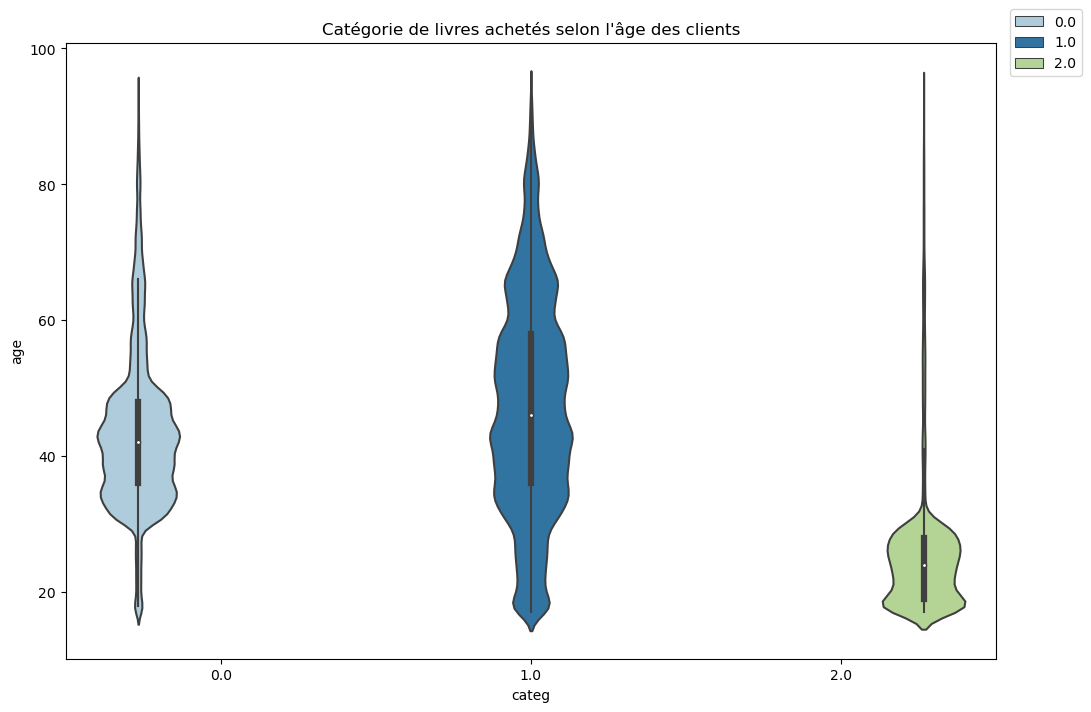

In [140]:
plt.figure(figsize=(12,8))
plt.title("Catégorie de livres achetés selon l'âge des clients")
sns.violinplot(age_categ, x="categ", y="age", hue="categ", palette="Paired")
plt.legend(bbox_to_anchor=(1.1,1), loc=5)
plt.show()

In [141]:
#Test Anova

#Création des groupes par catégorie
categ_0=age_categ[age_categ["categ"]==0]["age"]
categ_1=age_categ[age_categ["categ"]==1]["age"]
categ_2=age_categ[age_categ["categ"]==2]["age"]

In [142]:
#Test d'égalité des variances

levene_stat, levene_pvalue = stats.levene(categ_0,categ_1,categ_2)
print("Statistique W Levene :",levene_stat)
print("P-valeur Levene :", levene_pvalue )

Statistique W Levene : 24754.705338720643
P-valeur Levene : 0.0


In [143]:
#Test Anova non valide on applique le test non-paramétrique de Kruskal-Wallis
kruskal_stat, kruskal_pvalue = stats.kruskal(categ_0,categ_1,categ_2)
print("Statistique H Kruskal-Wallis :",kruskal_stat)
print("P-valeur Kruskal-Wallis:", kruskal_pvalue)

Statistique H Kruskal-Wallis : 71288.72911116139
P-valeur Kruskal-Wallis: 0.0


In [144]:
#Test de Tukey pour voir quels sont les groupes dont la moyenne diffère significativement des autres groupes

tukey1 = pairwise_tukeyhsd(endog=age_categ["age"],
                  groups=age_categ["categ"],
                  alpha=0.05)

tukey1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,3.879,0.0,3.7971,3.961,True
0.0,2.0,-17.794,0.0,-17.9706,-17.6175,True
1.0,2.0,-21.6731,0.0,-21.8548,-21.4914,True


In [ ]:
Tous les groupes ont une moyenne différente significative 